# **INSTALATTIONS**

In [ ]:
!pip install boto3
!pip install smart_open
!pip install s3fs
!pip install pydrive
!sudo apt upgrade
!sudo apt-get install ffmpeg
!pip install imageio-ffmpeg
!pip install ffmpeg-python
!sudo apt update
!pip install av
!pip install tqdm
!pip install rarfile
!curl https://rclone.org/install.sh | sudo bash -s beta
!sudo apt-get install fuse3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 848.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.88
    Uninstalling botocore-1.34.88:
      Successfully uninstalled botocore-1.34.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.

# **COMMON OPERATIONS**



```
# paste this on chatbot:One way to reduce the memory usage of this code is to write the zip file directly to the S3 bucket instead of keeping it in memory. This can be done by replacing the io.BytesIO object with an s3fs.S3File object, which allows you to write data directly to an S3 object as if it were a local file. Here’s an example of how this can be done:
```



# **RCLONE UPLOAD FROM URL WITHOUT USING RAM OR LOCAL STORAGE🔥🔥🔥🔥🔥**



```
list.txt eg:
https://s3.tebi.io/hiibii1/movie1.1080p.mkv
https://s3.tebi.io/hiibii1/movie2.mp4
```





```
**Real Ex of implementation:**
import subprocess

config_path = "/notebooks/rclone.conf"
remote_path = "phill:"
list_file = "/notebooks/list.txt"

# Get the list of files in the destination
list_output = subprocess.run(["rclone", "lsf", "--config=" + config_path, remote_path], capture_output=True, text=True)
existing_files = set(list_output.stdout.splitlines())

with open(list_file, "r") as file:
    for url in file:
        url = url.strip()
        file_name = url.split("/")[-1]

        # Check if the file already exists in the destination
        if file_name not in existing_files:
            subprocess.run(["rclone", "--config=" + config_path, "-P", "copyurl", "--auto-filename", url, remote_path])
```



In [ ]:
# save as python file and run

import subprocess

config_path = "/content/rclone1.conf"
remote_path = "remote:path"
list_file = "/notebooks/list.txt"

# Get the list of files in the destination
list_output = subprocess.run(["rclone", "lsf", "--config=" + config_path, remote_path], capture_output=True, text=True)
existing_files = set(list_output.stdout.splitlines())

with open(list_file, "r") as file:
    for url in file:
        url = url.strip()
        file_name = url.split("/")[-1]

        # Check if the file already exists in the destination
        if file_name not in existing_files:
            subprocess.run(["rclone", "--config=" + config_path, "-P", "copyurl", "--auto-filename", url, remote_path])

**single command**

In [ ]:
# replace url and remote path (will not upload if file exist already)
!rclone --config=/notebooks/rclone.conf -P copyurl --auto-filename --no-clobber "https://s3.tebi.io/hiibii1/movie.mkv" phill:

#with custon file name
!rclone --config=/notebooks/rclone.conf -P copyurl --no-clobber "https://s3.tebi.io/hiibii1/movie.mkv" drive:/movie_name.mkv


# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# **Create Directory**

In [ ]:
import os

dir_names = ['content2','content3','content4']
dir_path = '/content/'

for name in dir_names:
    path = os.path.join(dir_path, name)
    if os.path.exists(path):
        os.rmdir(path)
    os.mkdir(path)

# **WGET UPLOAD USING LINKS**

In [ ]:
#upload using links and move to specific folder
import os
import subprocess
import shutil
os.chdir('/content/onedrive4')
# Define the list of URL and output filename pairs
# url_filename_pairs = [
#     ('https://s3.tebi.io/ytube/Pichaikaran.2.2023.mkv', 'Pichaikarani.2.2023.mkv'),
#     ('https://s3.tebi.io/ytube/The.Whale.2022.1080P.REMUX.mkv', 'The.Whale.2022.1080P.REMUX.mkv'),
#     ('https://s3.tebi.io/ytube/The.Whale1.2022.1080P.REMUX.mkv', 'The.Whale1.2022.1080P.REMUX.mkv'),
# ]
url_filename_pairs = [
    ('https://s3.tebi.io/hiibii1/jailer.2023.4k.mkv', 'jailer.2023.4k.mkv'),
]
destination_path = '/content/onedrive4'

# Check if the destination directory exists, and create it if it doesn't
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Iterate over the list of URL and output filename pairs
for url, output_filename in url_filename_pairs:
    # Download the file using wget
    print(f'downloading {url}')
    subprocess.run(['wget', '-c', url, '--no-check-certificate', '-O', output_filename])

    # Move the downloaded file to the desired location
    print(f'moving {output_filename} to {destination_path}')
    shutil.move(output_filename, os.path.join(destination_path, output_filename))

downloading https://s3.tebi.io/hiibii1/jailer.2023.4k.mkv


KeyboardInterrupt: ignored

In [ ]:
import os
os.chdir('/content')
# !wget -c 'https://s3.tebi.io/tmove/21.grams.2003.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/Amores.perros.2000.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/Kadhalil.Vizhunthen.2008.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/Talk.to.her.2002.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/The.Motorcycle.Diaries.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/The.Secret.In.Their.Eyes.2009.1080p.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/The.sea.Inside.2004.mkv' --no-check-certificate
# !wget -c 'https://s3.tebi.io/tmove/sleep.tight.2011.mkv' --no-check-certificate
!wget -c 'https://s3.tebi.io/educationvnrr/Gifted.2017.eng.mkv' --no-check-certificate


--2024-05-16 07:01:42--  https://s3.tebi.io/educationvnrr/Gifted.2017.eng.mkv
Resolving s3.tebi.io (s3.tebi.io)... 89.187.179.198, 138.199.41.99, 2a02:6ea0:c464::1, ...
Connecting to s3.tebi.io (s3.tebi.io)|89.187.179.198|:443... connected.
Uploaded: 12.58/12.58 GB, Speed: 5.06 MB/s, Estimated remaining time: 0:00:00200 OK
Length: 13508112414 (13G) [video/x-matroska]
Saving to: ‘Gifted.2017.eng.mkv’

Gifted.2017.eng.mkv 100%[===================>]  12.58G  85.4MB/s    in 2m 32s  

2024-05-16 07:04:14 (84.8 MB/s) - ‘Gifted.2017.eng.mkv’ saved [13508112414/13508112414]



**wget generator for both notebook and terminal**

In [ ]:
#input the list to get required format for (copy files)
files = input("Enter the list of file names separated by spaces: ").split()

base_path = "/content/content/teminowe1/"
destination_path = "/content/tebi1/tebi/allfilesbucket"

for file in files:
    filename = file.strip(',').replace('"', '')  # Remove double quotes from file name
    source_path = f"{base_path}{filename}"
    print(f'shutil.copy("{source_path}", "{destination_path}")')


In [ ]:
#input the list to get required format for (uploading through url terminal)

files = [    ]

for file_name in files:
    upload_command = f"!wget -c 'https://s3.tebi.io/mme/{file_name}' --no-check-certificate"
    print(upload_command)
#wget -c 'https://stevephill49ii.hostings.workers.dev/0:/movies/Food%20Choices%20(2016)%20WEB.1080p.H264.mp4' --no-check-certificate -P /content/tebi4/tebi/src2

# **ZIP AND UNZIP WITHOUT CRASHING RAM USING S3**

In [ ]:
!pip install boto3
!pip install smart_open
!pip install s3fs
!pip install pydrive
!sudo apt upgrade
!sudo apt-get install ffmpeg
!pip install imageio-ffmpeg
!pip install ffmpeg-python
!sudo apt update
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.48
    Uninstalling botocore-1.31.48:


In [ ]:
#extract zip file without using local storage and without crashing ram
import boto3
import io
import zipfile
import s3fs

# Authenticate and create the Amazon S3 resource
s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='s5OHY7b99h2euDTi',
    aws_secret_access_key='dD0awJsTvrEEJHkcyAheh2gvkNd4M8TYtdZ04dab',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'moviesnow'
zip_object_key = 'Scam.1992.zip'
destination_folder = 'extracted-files1'

# Check if the destination folder exists, if not, create it
bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

# Mount the S3 bucket as a local file system
fs = s3fs.S3FileSystem(
    key='s5OHY7b99h2euDTi',
    secret='dD0awJsTvrEEJHkcyAheh2gvkNd4M8TYtdZ04dab',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)

# Read the zip file from the mounted S3 bucket
with fs.open(f"{bucket_name}/{zip_object_key}", 'rb') as s3_file:
    with zipfile.ZipFile(s3_file, 'r') as zip_ref:
        for file in zip_ref.infolist():
            with zip_ref.open(file, 'r') as source:
                # Create a new file in Amazon S3 for the extracted file
                extracted_file_key = f'{destination_folder}/{file.filename}'
                bucket.put_object(Key=extracted_file_key, Body=source.read())

In [ ]:
#extract zip file with select options without using local storage and without crashing ram
import boto3
import io
import zipfile
import s3fs
import time
import threading

def get_files_by_indices(zip_ref, indices):
    files = list(zip_ref.infolist())
    selected_files = [files[i] for i in indices]
    return selected_files

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

def user_file_selection(zip_ref):
    print("Files in the zip:")
    for i, file in enumerate(zip_ref.infolist()):
        print(f"{i}: {file.filename}")

    user_input = input("Enter comma-separated indices of files to extract: ")
    indices = [int(x.strip()) for x in user_input.split(',')]
    return get_files_by_indices(zip_ref, indices)

# Authenticate and create the Amazon S3 resource
s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
zip_object_key = 'andi/selected_files.zip'
destination_folder = 'unzi0'

# Check if the destination folder exists, if not, create it
bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

# Mount the S3 bucket as a local file system
fs = s3fs.S3FileSystem(
    key='05IVBYMslY8eDM1m',
    secret='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)

# Read the zip file from the mounted S3 bucket
with fs.open(f"{bucket_name}/{zip_object_key}", 'rb') as s3_file:
    with zipfile.ZipFile(s3_file, 'r') as zip_ref:
        selected_files = user_file_selection(zip_ref)
        total_bytes = sum(file.file_size for file in selected_files)
        bytes_transferred = [0]
        for i, file in enumerate(selected_files):
            with zip_ref.open(file, 'r') as source:
                # Create a new file in Amazon S3 for the extracted file
                extracted_file_key = f'{destination_folder}/{file.filename}'
                s3_client = s3.meta.client

                # Custom upload function to track progress
                def upload_callback(new_bytes_transferred):
                    bytes_transferred[0] += new_bytes_transferred
                    update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)

                start_time = time.time()
                s3_client.upload_fileobj(source, bucket_name, extracted_file_key, Callback=upload_callback)
                print(f'\nUploaded {file.filename}')

Files in the zip:
0: Sleep.tight.2011.1080p.mkv
Enter comma-separated indices of files to extract: 0
File 1/1 | Speed: 18.89 MB/s | Uploaded: 1478.77/1478.77 MB
Uploaded Sleep.tight.2011.1080p.mkv


In [ ]:
# testing failed
# working below 4gb
import boto3
import zipfile
import s3fs
import time

def user_file_selection(files):
    print("Files in the bucket:")
    for i, file in enumerate(files):
        print(f"{i}: {file}")

    user_input = input("Enter comma-separated indices of files to zip: ")
    indices = [int(x.strip()) for x in user_input.split(',')]
    return [files[i] for i in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

# Authenticate and create the Amazon S3 resource
s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='VPPg3laHJM3Fj97t',
    aws_secret_access_key='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
destination_folder = 'scam_2003'

# Check if the destination folder exists, if not, create it
bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

# Get the list of files in the bucket
files = [obj.key for obj in bucket.objects.all()]

# Prompt the user to select files to zip
selected_files = user_file_selection(files)

# Mount the S3 bucket as a local file system
fs = s3fs.S3FileSystem(
    key='VPPg3laHJM3Fj97t',
    secret='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)

extracted_file_key = f'{destination_folder}/selected_files.zip'

# Create a new zip file in the S3 bucket
with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output:
    with zipfile.ZipFile(output, 'w') as new_zip:
        total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
        bytes_transferred = [0]
        start_time = time.time()
        for i, file in enumerate(selected_files):
            # Read the file from the mounted S3 bucket
            with fs.open(f"{bucket_name}/{file}", 'rb') as source:
                # Write data to zip file in chunks to manage memory usage
                new_zip.writestr(file, b'')
                with new_zip.open(file, 'w') as destination:
                    while True:
                        chunk = source.read(2 * 1024 * 1024)  # Read data in 256 KB chunks
                        if not chunk:
                            break
                        destination.write(chunk)
                        bytes_transferred[0] += len(chunk)
                        update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
            print(f'\nZipped {file}')


In [ ]:
# without ram large file limited to notebook storage capacity here 79gb per file
import boto3
import zipfile
import s3fs
import time
import io
import tempfile

def user_file_selection(files):
    print("Files in the bucket:")
    for i, file in enumerate(files):
        print(f"{i}: {file}")

    user_input = input("Enter comma-separated indices of files to zip: ")
    indices = [int(x.strip()) for x in user_input.split(',')]
    return [files[i] for i in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='VPPg3laHJM3Fj97t',
    aws_secret_access_key='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
destination_folder = 'scam_2003'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

files = [obj.key for obj in bucket.objects.all()]
selected_files = user_file_selection(files)
fs = s3fs.S3FileSystem(
    key='VPPg3laHJM3Fj97t',
    secret='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)
extracted_file_key = f'{destination_folder}/selected_files.zip'

with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output, zipfile.ZipFile(output, 'w', allowZip64=True) as new_zip:
    total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
    bytes_transferred = [0]
    start_time = time.time()
    for i, file in enumerate(selected_files):
        with fs.open(f"{bucket_name}/{file}", 'rb') as source:
            with tempfile.NamedTemporaryFile() as tmp_file:  # open a temporary named file
                while True:
                    chunk = source.read(2 * 1024 * 1024) # 2MB at a time
                    if not chunk:
                        break
                    tmp_file.write(chunk)  # write the chunk to the temporary file
                    bytes_transferred[0] += len(chunk)
                    update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
                tmp_file.seek(0)  # reset the cursor of the temporary file
                new_zip.write(tmp_file.name, arcname=file)  # write the entire file to the Zip archive
        print(f'\nZipped {file}')

In [ ]:
# without ram large file limited to notebook storage capacity here 79gb per file(added file selection features)
import boto3
import zipfile
import s3fs
import time
import io
import tempfile

def show_files(files):
    for i, file in enumerate(files, 1):
        print(f"{i}. {file}")

def select_files(files):
    print("1. Transfer all files")
    print("2. Specify files to include")
    print("3. Specify files to exclude")
    case = input("Enter your choice (1/2/3): ")

    if case == '1':
        return files

    elif case == '2':
        user_input = input("Enter comma-separated indices of files to include: ")
        indices = [int(x.strip()) for x in user_input.split(',')]
        return [files[i] for i in indices]

    elif case == '3':
        user_input = input("Enter comma-separated indices of files to exclude: ")
        indices = [int(x.strip()) for x in user_input.split(',')]
        return [files[i] for i in range(len(files)) if i not in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'ict10'
destination_folder = 'ict10'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

files = [obj.key for obj in bucket.objects.all()]
show_files(files)
selected_files = select_files(files)
fs = s3fs.S3FileSystem(
    key='05IVBYMslY8eDM1m',
    secret='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)
extracted_file_key = f'{destination_folder}/selected_files.zip'

# Check if each file exists, if not create it
for file in selected_files:
    if not fs.exists(f"{bucket_name}/{file}"):
        fs.touch(f"{bucket_name}/{file}")

with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output, zipfile.ZipFile(output, 'w', allowZip64=True) as new_zip:
    total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
    bytes_transferred = [0]
    start_time = time.time()
    for i, file in enumerate(selected_files):
        with fs.open(f"{bucket_name}/{file}", 'rb') as source:
            with tempfile.NamedTemporaryFile() as tmp_file:  # open a temporary named file
                while True:
                    chunk = source.read(2 * 1024 * 1024) # 2MB at a time
                    if not chunk:
                        break
                    tmp_file.write(chunk)  # write the chunk to the temporary file
                    bytes_transferred[0] += len(chunk)
                    update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
                tmp_file.seek(0)  # reset the cursor of the temporary file
                new_zip.write(tmp_file.name, arcname=file)  # write the entire file to the Zip archive
        print(f'\nZipped {file}')



1. 3rd-Party Files/
2. 3rd-Party Files/Abbreviations - @TRSTNGLRD.pdf
3. 3rd-Party Files/Glossary of ICT Terms - @TRSTNGLRD.pdf
4. ICT Lectures/
5. ICT Lectures/Concept Overviews/
6. ICT Lectures/Concept Overviews/Concept Overview - Bridge Builder - @TRSTNGLRD.mp4
7. ICT Lectures/Other/
8. ICT Lectures/Other/Counting Candles - @TRSTNGLRD.mp4
9. ICT Lectures/Other/Laundry & Drama - @TRSTNGLRD.mp4
10. ICT Lectures/Other/Live - 2016 - @TRSTNGLRD.mp4
11. ICT Lectures/Other/Time Distortion - @TRSTNGLRD.mp4
12. ICT Lectures/Price-Action Lectures/
13. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Advanced IPDA Insights - @TRSTNGLRD.mp4
14. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Price Theory (Part 1) - @TRSTNGLRD.mp4
15. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Price Theory (Part 2) - @TRSTNGLRD.mp4
16. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Cross Currency 

OSError: ignored

In [ ]:
#without local storage but with heavy use of ram (use for papaerspace and other cloud which has high ram )
import boto3
import zipfile
import s3fs
import time
import io

def user_file_selection(files):
    print("Files in the bucket:")
    for i, file in enumerate(files):
        print(f"{i}: {file}")

    user_input = input("Enter comma-separated indices of files to zip: ")
    indices = [int(x.strip()) for x in user_input.split(',')]
    return [files[i] for i in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'ict10'
destination_folder = 'trade'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

files = [obj.key for obj in bucket.objects.all()]
selected_files = user_file_selection(files)
fs = s3fs.S3FileSystem(
    key='VPPg3laHJM3Fj97t',
    secret='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)
extracted_file_key = f'{destination_folder}/selected_files1.zip'

with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output, zipfile.ZipFile(output, 'w', allowZip64=True) as new_zip:
    total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
    bytes_transferred = [0]
    start_time = time.time()
    for i, file in enumerate(selected_files):
        with fs.open(f"{bucket_name}/{file}", 'rb') as source:
            data_bytearray = bytearray()
            while True:
                chunk = source.read(2 * 1024 * 1024) # 2MB at a time
                if not chunk:
                    break
                data_bytearray.extend(chunk)
                bytes_transferred[0] += len(chunk)
                update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
            io_bytes = io.BytesIO(data_bytearray)
            new_zip.writestr(file, io_bytes.getvalue())
        print(f'\nZipped {file}')

Uploaded: 86.97/0.04 GB, Speed: 18.35 MB/s, Estimated remaining time: -1 day, 22:39:08.353015Files in the bucket:
0: 3rd-Party Files/
1: 3rd-Party Files/Abbreviations - @TRSTNGLRD.pdf
2: 3rd-Party Files/Glossary of ICT Terms - @TRSTNGLRD.pdf
3: ICT Lectures/
4: ICT Lectures/Concept Overviews/
5: ICT Lectures/Concept Overviews/Concept Overview - Bridge Builder - @TRSTNGLRD.mp4
6: ICT Lectures/Other/
7: ICT Lectures/Other/Counting Candles - @TRSTNGLRD.mp4
8: ICT Lectures/Other/Laundry & Drama - @TRSTNGLRD.mp4
9: ICT Lectures/Other/Live - 2016 - @TRSTNGLRD.mp4
10: ICT Lectures/Other/Time Distortion - @TRSTNGLRD.mp4
11: ICT Lectures/Price-Action Lectures/
12: ICT Lectures/Price-Action Lectures/Price-Action Lecture - Advanced IPDA Insights - @TRSTNGLRD.mp4
13: ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Price Theory (Part 1) - @TRSTNGLRD.mp4
14: ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Pri

In [ ]:
#without local storage but with heavy use of ram (use for papaerspace and other cloud which has high ram ) aaded skiilpng and selection
from io import BytesIO
import boto3
import zipfile
import s3fs
import time
import io
import tempfile

def show_files(files):
    for i, file in enumerate(files, 1):
        print(f"{i}. {file}")

def select_files(files):
    print("1. Transfer all files")
    print("2. Specify files to include")
    print("3. Specify files to exclude")
    case = input("Enter your choice (1/2/3): ")

    if case == '1':
        return files

    elif case == '2':
        user_input = input("Enter comma-separated indices of files to include: ")
        indices = [int(x.strip()) for x in user_input.split(',')]
        return [files[i] for i in indices]

    elif case == '3':
        user_input = input("Enter comma-separated indices of files to exclude: ")
        indices = [int(x.strip()) for x in user_input.split(',')]
        return [files[i] for i in range(len(files)) if i not in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'ict10'
destination_folder = 'ict10'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

files = [obj.key for obj in bucket.objects.all()]
show_files(files)
selected_files = select_files(files)
fs = s3fs.S3FileSystem(
    key='05IVBYMslY8eDM1m',
    secret='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)
extracted_file_key = f'{destination_folder}/selected_files.zip'

# Check if each file exists, if not create it
for file in selected_files:
    if not fs.exists(f"{bucket_name}/{file}"):
        fs.touch(f"{bucket_name}/{file}")


with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output, zipfile.ZipFile(output, 'w', allowZip64=True) as new_zip:
    total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
    bytes_transferred = [0]
    start_time = time.time()
    for i, file in enumerate(selected_files):
        with fs.open(f"{bucket_name}/{file}", 'rb') as source:
            with BytesIO() as tmp_file:  # open a BytesIO object
                while True:
                    chunk = source.read(6 * 1024 * 1024) # 2MB at a time
                    if not chunk:
                        break
                    tmp_file.write(chunk)  # write the chunk to the BytesIO object
                    bytes_transferred[0] += len(chunk)
                    update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
                tmp_file.seek(0)  # reset the cursor of the BytesIO object
                new_zip.writestr(file, tmp_file.getvalue())  # write the entire file to the Zip archive
        print(f'\nZipped {file}')


1. 3rd-Party Files/
2. 3rd-Party Files/Abbreviations - @TRSTNGLRD.pdf
3. 3rd-Party Files/Glossary of ICT Terms - @TRSTNGLRD.pdf
4. ICT Lectures/
5. ICT Lectures/Concept Overviews/
6. ICT Lectures/Concept Overviews/Concept Overview - Bridge Builder - @TRSTNGLRD.mp4
7. ICT Lectures/Other/
8. ICT Lectures/Other/Counting Candles - @TRSTNGLRD.mp4
9. ICT Lectures/Other/Laundry & Drama - @TRSTNGLRD.mp4
10. ICT Lectures/Other/Live - 2016 - @TRSTNGLRD.mp4
11. ICT Lectures/Other/Time Distortion - @TRSTNGLRD.mp4
12. ICT Lectures/Price-Action Lectures/
13. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Advanced IPDA Insights - @TRSTNGLRD.mp4
14. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Price Theory (Part 1) - @TRSTNGLRD.mp4
15. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Blending Price Patterns With Time & Price Theory (Part 2) - @TRSTNGLRD.mp4
16. ICT Lectures/Price-Action Lectures/Price-Action Lecture - Cross Currency 

KeyboardInterrupt: ignored

In [ ]:
!pip install lz4


In [ ]:
#without ram and storage (not working splitiing into parts )
import boto3
import zipfile
import s3fs
import time

def user_file_selection(files):
    print("Files in the bucket:")
    for i, file in enumerate(files):
        print(f"{i}: {file}")

    user_input = input("Enter comma-separated indices of files to zip: ")
    indices = [int(x.strip()) for x in user_input.split(',')]
    return [files[i] for i in indices]

def update_progress_bar(start_time, current_file, total_files, bytes_transferred, total_bytes):
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred[0] / (1024 ** 2)) / elapsed_time
    print(f'\rFile {current_file + 1}/{total_files} | Speed: {speed:.2f} MB/s | '
          f'Uploaded: {bytes_transferred[0] / (1024 ** 2):.2f}/{total_bytes / (1024 ** 2):.2f} MB', end='')

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='VPPg3laHJM3Fj97t',
    aws_secret_access_key='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
destination_folder = 'nostoram'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

files = [obj.key for obj in bucket.objects.all()]
selected_files = user_file_selection(files)
fs = s3fs.S3FileSystem(
    key='VPPg3laHJM3Fj97t',
    secret='egGMsKc8wS9KflqHdMKdXbjRBbuBV8EC7MXEL0ft',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)
extracted_file_key = f'{destination_folder}/selected_files.zip'

with fs.open(f"{bucket_name}/{extracted_file_key}", 'wb') as output, zipfile.ZipFile(output, 'w', allowZip64=True) as new_zip:
    total_bytes = sum(fs.size(f"{bucket_name}/{file}") for file in selected_files)
    bytes_transferred = [0]
    start_time = time.time()
    for i, file in enumerate(selected_files):
        with fs.open(f"{bucket_name}/{file}", 'rb') as source:
            while True:
                chunk = source.read(2 * 1024 * 1024) # 2MB at a time
                if not chunk:
                    break
                new_zip.writestr(file, chunk)
                bytes_transferred[0] += len(chunk)
                update_progress_bar(start_time, i, len(selected_files), bytes_transferred, total_bytes)
        print(f'\nZipped {file}')


Files in the bucket:
0: 7G.Rainbow.Colony.2004.1080p.mkv
1: Aayirathil.Oruvan.2010.1080p.mkv
2: Air.Force.One.1997.1080p.mkv
3: Anniyan.2005.1080p.mkv
4: Avatar.2009.multi.1080p.mkv
5: Azhagiya.Tamilmagan.2007.1080p.mkv
6: Chandramukhi.2005.1080p.mkv
7: Kaadhal.Kondein.2003.1080p.mkv
8: Loft.2008.1080p.mkv
9: May.God.Save.us.2016.1080p.mkv
10: Nayakan.1987.1080p.mkv
11: Scam.2003.zip
12: Sivaji.2007.1080p.mkv
13: Sleep.tight.2011.1080p.mkv
14: Tell.no.one.2006.1080p.mkv
15: Thalapathi.1991.1080p.mkv
16: The.Body.2012.1080p.mp4
17: The.Hidden.Face.2011.1080p.mkv
18: The.Shawshank.Redemption.multi.1994.1080p.mkv
19: The.Town.2010.1080p.mkv
20: Thevar.Magan.1992.1080p.mkv
21: Vaaranam.Aayiram.2008.4K.mkv
22: Vettaiyaadu.Vilaiyaadu.multi.2006.1080p.mkv
23: Virumaandi .2004.1080p.mkv
24: Wind.river.2017.1080p.mkv
25: jailer.2023.4k.mkv
26: jailer.2023.mkv
27: nosra/
28: nostoram/
29: scam_2003/
30: scam_2003/Scam.2003.The.Telgi.Story.S01.2160p.SONYLIV.WEB-DL.Multi.DDP5.1.Atmos.DV.HDR10Plus.

/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Vettaiyaadu.Vilaiyaadu.multi.2006.1080p.mkv'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


File 1/2 | Speed: 5.98 MB/s | Uploaded: 370.00/27088.93 MB

KeyboardInterrupt: ignored

In [ ]:
!pip install stream-zip

In [ ]:
# zipping success but corrupt output
import boto3
import s3fs
from stream_zip import stream_zip, NO_COMPRESSION_32
import datetime

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
destination_folder = 'andi'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

all_files = [obj.key for obj in bucket.objects.all()]
fs = s3fs.S3FileSystem(
    key='05IVBYMslY8eDM1m',
    secret='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)

# List all files and ask the user to select which ones to zip
print("Files in the bucket:")
for i, file in enumerate(all_files):
    print(f"{i}: {file}")
user_input = input("Enter comma-separated indices of files to zip: ")
indices = [int(x.strip()) for x in user_input.split(',')]
files_to_zip = [all_files[i] for i in indices]

extracted_file_key = f'{destination_folder}/selected_files.zip'

output = fs.open(f"{bucket_name}/{extracted_file_key}", 'wb')
for file in files_to_zip:
    with fs.open(f"{bucket_name}/{file}", 'rb') as source:
        while True:
            chunk = source.read(15 * 1024 * 1024)  # read 1MB at a time
            if not chunk:
                break
            modified_at = datetime.datetime.now()  # or another datetime object
            file_mode = 0o777  # or another appropriate mode
            for data in stream_zip([(file, modified_at, file_mode, NO_COMPRESSION_32, [chunk])]):
                output.write(data)
            del chunk  # release memory
output.close()


Files in the bucket:
0: 7G.Rainbow.Colony.2004.1080p.mkv
1: A.Martfui.Rem.2016.1080p.mkv
2: Aayirathil.Oruvan.2010.1080p.mkv
3: Air.Force.One.1997.1080p.mkv
4: Anniyan.2005.1080p.mkv
5: Avatar.2009.multi.1080p.mkv
6: Azhagiya.Tamilmagan.2007.1080p.mkv
7: Chandramukhi.2005.1080p.mkv
8: Eteros.Ego.2016.1080p.mkv
9: Kaadhal.Kondein.2003.1080p.mkv
10: Loft.2008.1080p.mkv
11: May.God.Save.us.2016.1080p.mkv
12: Nayakan.1987.1080p.mkv
13: README.md
14: Scam.2003.zip
15: Sivaji.2007.1080p.mkv
16: Sleep.tight.2011.1080p.mkv
17: Tell.no.one.2006.1080p.mkv
18: Thalapathi.1991.1080p.mkv
19: The.Body.2012.1080p.mp4
20: The.Dead.Girl.2006.1080p.mkv
21: The.Hidden.Face.2011.1080p.mkv
22: The.Night.of.the.12th.2022.1080p.mkv
23: The.Shawshank.Redemption.multi.1994.1080p.mkv
24: The.Town.2010.1080p.mkv
25: Thevar.Magan.1992.1080p.mkv
26: Vaaranam.Aayiram.2008.4K.mkv
27: Vettaiyaadu.Vilaiyaadu.multi.2006.1080p.mkv
28: Virumaandi .2004.1080p.mkv
29: Wind.river.2017.1080p.mkv
30: andi/
31: andi/selected_f

In [ ]:
# zipping testing (WITH 1 ZIP FILE SUCCESS)
import boto3
import s3fs
from stream_zip import stream_zip, NO_COMPRESSION_32
import datetime
from io import BytesIO

s3 = boto3.resource(
    service_name='s3',
    aws_access_key_id='05IVBYMslY8eDM1m',
    aws_secret_access_key='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    endpoint_url='https://s3.tebi.io'
)

bucket_name = 'hiibii1'
destination_folder = 'andi'

bucket = s3.Bucket(bucket_name)
folder_exists = False
for obj in bucket.objects.filter(Prefix=destination_folder):
    if obj.key == f"{destination_folder}/":
        folder_exists = True
        break

if not folder_exists:
    bucket.put_object(Key=f"{destination_folder}/", Body=b'')

all_files = [obj.key for obj in bucket.objects.all()]
fs = s3fs.S3FileSystem(
    key='05IVBYMslY8eDM1m',
    secret='qXxnBdu2I7C8WakeNnH3rxmKnW20UrznWqQK2SZ5',
    client_kwargs={'endpoint_url': 'https://s3.tebi.io'}
)

# List all files and ask the user to select which ones to zip
print("Files in the bucket:")
for i, file in enumerate(all_files):
    print(f"{i}: {file}")
user_input = input("Enter comma-separated indices of files to zip: ")
indices = [int(x.strip()) for x in user_input.split(',')]
files_to_zip = [all_files[i] for i in indices]

extracted_file_key = f'{destination_folder}/selected_files.zip'

output = fs.open(f"{bucket_name}/{extracted_file_key}", 'wb')
for file in files_to_zip:
    chunks = []  # create a list to store chunks of this file
    with fs.open(f"{bucket_name}/{file}", 'rb') as source:
        while True:
            chunk = source.read(15 * 1024 * 1024)  # read 1MB at a time
            if not chunk:
                break
            chunks.append(chunk)  # add this chunk to the list
            del chunk  # release memory

    # outside of the while loop, pass all chunks of this file to stream_zip
    modified_at = datetime.datetime.now()  # or another datetime object
    file_mode = 0o777  # or another appropriate mode
    for data in stream_zip([(file, modified_at, file_mode, NO_COMPRESSION_32, chunks)]):
        output.write(data)

output.close()


Files in the bucket:
0: 7G.Rainbow.Colony.2004.1080p.mkv
1: A.Martfui.Rem.2016.1080p.mkv
2: Aayirathil.Oruvan.2010.1080p.mkv
3: Air.Force.One.1997.1080p.mkv
4: Anniyan.2005.1080p.mkv
5: Avatar.2009.multi.1080p.mkv
6: Azhagiya.Tamilmagan.2007.1080p.mkv
7: Chandramukhi.2005.1080p.mkv
8: Eteros.Ego.2016.1080p.mkv
9: Kaadhal.Kondein.2003.1080p.mkv
10: Loft.2008.1080p.mkv
11: May.God.Save.us.2016.1080p.mkv
12: Nayakan.1987.1080p.mkv
13: README.md
14: Scam.2003.zip
15: Sivaji.2007.1080p.mkv
16: Sleep.tight.2011.1080p.mkv
17: Tell.no.one.2006.1080p.mkv
18: Thalapathi.1991.1080p.mkv
19: The.Body.2012.1080p.mp4
20: The.Dead.Girl.2006.1080p.mkv
21: The.Hidden.Face.2011.1080p.mkv
22: The.Night.of.the.12th.2022.1080p.mkv
23: The.Shawshank.Redemption.multi.1994.1080p.mkv
24: The.Town.2010.1080p.mkv
25: Thevar.Magan.1992.1080p.mkv
26: Vaaranam.Aayiram.2008.4K.mkv
27: Vettaiyaadu.Vilaiyaadu.multi.2006.1080p.mkv
28: Virumaandi .2004.1080p.mkv
29: Wind.river.2017.1080p.mkv
30: andi/
31: andi/selected_f

# **FFMPEG OPERATION USING RCLONE TESTING**

In [ ]:
!pip install boto3
!pip install smart_open
!pip install s3fs
!pip install pydrive
!sudo apt upgrade
!sudo apt-get install ffmpeg
!pip install imageio-ffmpeg
!pip install ffmpeg-python
!sudo apt update
!pip install av

  Using cached botocore-1.31.46-py3-none-any.whl (11.2 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.17
    Uninstalling botocore-1.31.17:
      Successfully uninstalled botocore-1.31.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.4 requires botocore<1.31.18,>=1.31.17, but you have botocore 1.31.46 which is incompatible.
  Using cached botocore-1.31.17-py3-none-any.whl (11.1 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.46
    Uninstalling botocore-1.31.46:
      Successfully uninstalled botocore-1.31.46
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.28.46 requires botocore<1.32.0,>=1.31.46, but you have botocore 1.31.17 which is inc

In [ ]:
!curl https://rclone.org/install.sh | sudo bash -s beta
!sudo apt-get install fuse3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4707  100  4707    0     0   6292      0 --:--:-- --:--:-- --:--:--  6292

The latest beta version of rclone rclone v1.65.0-beta.7368.62db2bb32 is already installed.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fuse3 is already the newest version (3.10.5-1build1).
The following package was automatically installed and is no longer required:
  libfuse2
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import os
import json
import subprocess

def list_remotes(config_path):
    command = ['rclone', '--config', config_path, 'config', 'dump']
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()

    if process.returncode != 0:
        print("Error occurred while trying to list remotes: \n", error.decode('utf-8'))
        return None
    else:
        config = json.loads(output.decode('utf-8'))
        remote_names = list(config.keys())
        return remote_names


def mount_remote(config_path, remote_name, base_mount_path):
    index = 1
    original_remote_name = remote_name

    # Form initial mount point
    mount_point = os.path.join(base_mount_path, remote_name)

    # Check if the directory exists and create a new one if it does
    while True:
        try:
            os.makedirs(mount_point)
            break
        except FileExistsError:
            print(f"{mount_point} already exists. Trying with a new directory...")
            remote_name = original_remote_name + str(index)
            mount_point = os.path.join(base_mount_path, remote_name)
            index += 1

    mount_command = [
        'rclone',
        'mount',
        original_remote_name + ':',
        mount_point,
        '--config',
        config_path,
        '-v',
        '--allow-non-empty',
        '--allow-other',
        '--daemon'
    ]

    process = subprocess.Popen(mount_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()

    if process.returncode != 0:
        print("Error occurred while trying to mount: \n", error.decode('utf-8'))
        return False
    else:
        print("Successfully mounted remote at", mount_point)
        print("Output: \n", output.decode('utf-8'))
        return True

if __name__ == "__main__":
    config_path = '/content/rclone.conf'
    base_mount_path = '/content/'  # Replace with your base directory

    remote_names = list_remotes(config_path)

    if remote_names is not None:
        for remote_name in remote_names:
            # Use the remote name as the mount directory
            mount_remote(config_path, remote_name, base_mount_path)


Successfully mounted remote at /content/onedrive
Output: 
 
Successfully mounted remote at /content/phill
Output: 
 


In [ ]:
# mount rclone in selected folder(no need)
import subprocess
import os

def mount_remote(config_path, remote_name, mount_point):
    # Check if mount point exists, if not create it.
    if not os.path.isdir(mount_point):
        os.makedirs(mount_point)

    # -v for verbose
    # --allow-non-empty for being able to write data to the remote
    # --allow-other for allowing other users to access the remote
    # --daemon to make rclone run in the background
    mount_command = [
        'rclone',
        'mount',
        remote_name + ':',
        mount_point,
        '--config',
        config_path,
        '-v',
        '--allow-non-empty',
        '--allow-other',
        '--daemon'
    ]

    process = subprocess.Popen(mount_command, stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    output, error = process.communicate()

    if process.returncode != 0:
        print("Error occurred while trying to mount: \n", error.decode('utf-8'))
        return False
    else:
        print("Successfully mounted remote at", mount_point)
        print("Output: \n", output.decode('utf-8'))
        return True

if __name__ == "__main__":
    config_path = '/content/rclone.conf'
    remote_name = 'phill'
    mount_point = '/content/phill4'

    mount_remote(config_path, remote_name, mount_point)

Uploaded: 0.00/1.60 GB, Speed: 0.00 MB/s, Estimated remaining time: UnknownSuccessfully mounted remote at /content/phill4
Output: 
 


In [ ]:
#print paths from mounted remotes
import os

def list_files(mount_point):
    for dirpath, dirnames, filenames in os.walk(mount_point):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            print(file_path)

if __name__ == "__main__":
    mount_point = '/content/phill'
    list_files(mount_point)


/content/phill/@Team_HDT - Yaaradi Nee Mohini (2008) [Tamil - 1080p - UNTOUCHED HD AVC - x264 - [DD5.1 (448Kbps) + DTS5.1 + AAC] - 6.8GB].mkv
/content/phill/Body.Parts.2022.mkv
/content/phill/Copy of @TroopOriginals - Parasakthi (1952) - 1080p HQ AMZN WEB-DL - 8.4GB - [(Tamil) DD+ 2.0 - 224kbps] - ×264 Esub.mkv
/content/phill/The.Body.2012.1080p.mp4
/content/phill/The.Shawshank.Redemption.multi.1994.1080p.mkv
/content/phill/Vettaiyaadu.Vilaiyaadu.multi.2006.1080p.mkv
/content/phill/brainwashed.sex.camera.power.2022.mkv
/content/phill/drive.py
/content/phill/pikdrop
/content/phill/Colab Notebooks/drive.ipynb
/content/phill/Colab Notebooks/rclon.ipynb
/content/phill/GDFlix/Chennaieil.Oru.Naal.2013.1080p.SNXT.WEB-DL.DD+5.1.H.264-HBN.mkv
/content/phill/GDFlix/ERUMBHU.2023.1080p.AMZN.WEB-DL.DDP5.1.H.264-BeAsT.mkv
/content/phill/GDFlix/Ghilli.2004.1080p.DPHS.WEB-DL.AAC.2.0.H.264-BeAsT.mkv
/content/phill/GDFlix/Scam.2003 .The.Telgi.Story.S01E01.2160p.HDR10Plus-DV.SONY.WEB.DL.Multi.DDP5.1.Atmo

In [ ]:
!lspci | grep -i nvidia

Uploaded: 0.00/1.60 GB, Speed: 0.00 MB/s, Estimated remaining time: Unknown/bin/bash: line 1: lspci: command not found


In [ ]:
import os
os.chdir('/content/onedrive')
# !ffmpeg -hwaccel cuda -i brainwashed.sex.camera.power.2022.mkv -c:v h264_nvenc -preset slow brainwashed.sex.camera.power.2022.mp4
# !ffmpeg -hwaccel cuda -i brainwashed.sex.camera.power.2022.mkv -c:v h264_nvenc -preset fast brainwashed.sex.camera.power.2022.mp4
# !ffmpeg -hwaccel cuda -threads 2 -i input.mkv -c:v h264_nvenc -preset lossless output.mp4
# !ffmpeg -hwaccel cuda -threads 2 -i brainwashed.sex.camera.power.2022.mkv -c:v hevc_nvenc -preset lossless brainwashed.sex.camera.power.2022i.mp4
# !ffmpeg -hwaccel cuda -threads 2 -i brainwashed.sex.camera.power.2022.mkv -c:v h264_nvenc -crf 18 brainwashed.sex.camera.power.2022.64.mp4
# !ffmpeg -threads 2 -hwaccel auto -i brainwashed.sex.camera.power.2022.mkv brainwashed.sex.camera.power.2022.final.mp4
!ffmpeg -i Thalapathi.1991.1080p.mkv -codec copy Thalapathi.1991.1080p.mp4


OSError: ignored

In [ ]:
import multiprocessing

num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {num_cores}")


Number of CPU cores: 2


# **UPLOAD TO GOOGLE DRIVE USING URL(not working)**

In [ ]:
#install packages
!pip install --upgrade google-api-python-client
!pip install --upgrade google-auth-oauthlib google-auth-httplib2
!pip install oauth2client
!pip install google-auth
!pip install google-auth-oauthlib
!pip install google-auth-httplib2
!pip install google-api-python-client
!pip install oauth2client
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client oauth2client
!pip install --upgrade google-colab
!pip install --upgrade google-auth google-auth-oauthlib
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client



In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

In [ ]:
import requests
import mimetypes
from google.oauth2 import credentials
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from googleapiclient.http import MediaIoBaseUpload
from io import BytesIO

CLIENT_ID = '479203176707-9mdv2vesfn12h1654kj1hophi8su5ss1.apps.googleusercontent.com'
CLIENT_SECRET = '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'
REDIRECT_URI = 'https://developers.google.com/oauthplayground'
REFRESH_TOKEN = ''

creds = credentials.Credentials.from_authorized_user_info(
    info={
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        'refresh_token': REFRESH_TOKEN,
        'token_uri': 'https://oauth2.googleapis.com/token',
    }
)

drive_service = build('drive', 'v3', credentials=creds)

def upload_file_from_url(url, file_name):
    try:
        print(f'Uploading this file: {file_name}')
        response = requests.get(url, stream=True)
        response.raise_for_status()

        mime_type, _ = mimetypes.guess_type(url)
        file_metadata = {'name': file_name, 'mimeType': mime_type}
        media = MediaIoBaseUpload(BytesIO(response.content), mimetype=mime_type, resumable=True)
        file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
        print(f'Uploaded this file: {file_name}, File ID: {file.get("id")}')
    except HttpError as error:
        print(f'An error occurred: {error}')
        file = None
    except requests.exceptions.RequestException as error:
        print(f'An error occurred while downloading the file: {error}')
        file = None

    return file

# url_to_filename = {
#     'https://example.com/path/to/your/image1.jpg': 'custom_image1.jpg',
#     'https://example.com/path/to/your/image2.jpg': 'custom_image2.jpg',
#     # Add more URLs and custom file names as needed
# }
url_to_filename = {
    'https://s3.tebi.io/hiibii1/The.Shawshank.Redemption.multi.1994.1080p.mkv': 'The.Shawshank.Redemption.multi.1994.1080p.mkv',

}

for url, file_name in url_to_filename.items():
    upload_file_from_url(url, file_name)

# **Bulk Upload TO S3 Bucket Using Folder or links Without Using Disk Space or Crashing Ram**

In [ ]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.3 MB/s eta 0:00:00


In [ ]:
#upload file or folder or subfolder maintain folder structure
import os
import time
from datetime import datetime, timedelta
import boto3
import threading

# Let's use S3
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='xKOZi9Cu0L1Pj3gL',
    aws_secret_access_key='90O3rBr5pEP8tgETYMRjQlYbR0lmnl61tzr2w6DD',
    endpoint_url='https://s3.tebi.io'
)

# Set the path
path = '/content/drive/MyDrive/fullvideo.mkv'

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    # Schedule the next progress update
    threading.Timer(1, show_progress).start()

# Custom progress callback function to display upload progress
def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

def upload_files(path, root_path):
    for item_name in os.listdir(path):
        item_path = os.path.join(path, item_name)

        # Check if the item is a file or a directory
        if os.path.isfile(item_path):
            print(f"Uploading {item_name}")

            # Upload each file to S3 with the relative path as key
            with open(item_path, 'rb') as data:
                file_size = os.path.getsize(item_path)
                total_bytes = file_size
                start_time = time.time()  # Store the start time of the upload for calculating speed
                show_progress()  # Start showing progress updates

                s3_key = os.path.relpath(item_path, root_path).replace(os.sep, '/')
                s3.upload_fileobj(data, 'testinguploadee', s3_key, Callback=progress_callback)

                print(f'\nUploaded {item_name}')
        elif os.path.isdir(item_path):
            upload_files(item_path, root_path)  # Recursive call for directories
        else:
            print(f"Skipping {item_name} (not a file)")

# Check if the path is a file or a directory
if os.path.isfile(path):
    print(f"Uploading {os.path.basename(path)}")

    # Upload the file to S3
    with open(path, 'rb') as data:
        file_size = os.path.getsize(path)
        total_bytes = file_size
        start_time = time.time()  # Store the start time of the upload for calculating speed
        show_progress()  # Start showing progress updates

        s3.upload_fileobj(data, 'videomeme', os.path.basename(path), Callback=progress_callback)

        print(f'\nUploaded {os.path.basename(path)}')
elif os.path.isdir(path):
    upload_files(path, path)  # Call function for directories

print('Upload completed successfully!')


Uploaded: 0.00/0.04 GB, Speed: 0.00 MB/s, Estimated remaining time: UnknownUploading ICT Series/Self-Reflection Series/Lesson #3 - If I Could Go Back & Tell Myself What I Know Now - @TRSTNGLRD.mp4
Uploaded: 0.05/0.04 GB, Speed: 0.25 MB/s, Estimated remaining time: -1 day, 23:59:55.855250
Uploaded ICT Series/Self-Reflection Series/Lesson #3 - If I Could Go Back & Tell Myself What I Know Now - @TRSTNGLRD.mp4
Uploaded: 0.05/0.04 GB, Speed: 0.25 MB/s, Estimated remaining time: -1 day, 23:59:55.855189Uploading ICT Series/Self-Reflection Series/Lesson #2 - If I Could Go Back & Tell Myself What I Know Now - @TRSTNGLRD.mp4
Uploaded: 0.11/0.04 GB, Speed: 0.58 MB/s, Estimated remaining time: -1 day, 23:58:07.163131
Uploaded ICT Series/Self-Reflection Series/Lesson #2 - If I Could Go Back & Tell Myself What I Know Now - @TRSTNGLRD.mp4
Uploading ICT Series/Self-Reflection Series/Lesson #4 - If I Could Go Back & Tell Myself What I Know Now - @TRSTNGLRD.mp4
Uploaded: 0.19/0.04 GB, Speed: 1.01 MB/s, 

Exception in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread started byException ignored in sys.unraisablehookException in thread Exception in threading.excepthook:Exception ignored in thread s

In [ ]:
#Upload by folder
import os
import time
from datetime import datetime, timedelta
import boto3
import threading

# Let's use S3
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='xKOZi9Cu0L1Pj3gL',
    aws_secret_access_key='90O3rBr5pEP8tgETYMRjQlYbR0lmnl61tzr2w6DD',
    endpoint_url='https://s3.tebi.io'
)

# Set the folder path
folder_path = '/content/content3'

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    # Schedule the next progress update
    threading.Timer(1, show_progress).start()

# Custom progress callback function to display upload progress
def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

# Loop through all items in the folder
for item_name in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item_name)

    # Check if the item is a file
    if os.path.isfile(item_path):
        print(f"Uploading {item_name}")

        # Upload each file to S3
        with open(item_path, 'rb') as data:
            file_size = os.path.getsize(item_path)
            total_bytes = file_size
            start_time = time.time()  # Store the start time of the upload for calculating speed
            show_progress()  # Start showing progress updates
            s3.upload_fileobj(data, 'nana', item_name, Callback=progress_callback)
            print(f'\nUploaded {item_name}')
    else:
        print(f"Skipping {item_name} (not a file)")

print('All files uploaded successfully!')

Skipping .ipynb_checkpoints (not a file)
Uploading Hi.Nanna.mkv
Uploaded: 1.85/1.85 GB, Speed: 67.30 MB/s, Estimated remaining time: 0:00:00

NoSuchUpload: An error occurred (NoSuchUpload) when calling the CompleteMultipartUpload operation: The specified multipart upload does not exist. The upload ID might be invalid, or the multipart upload might have been aborted or completed.

In [ ]:
#upload from link to s3 without crashing ram or utilizing storage for tebi
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use S3
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='JngRo4NhaqBYP5hW',
    aws_secret_access_key='zhILxlGejNU9aWyizI5yQPO0YVRGTp6hoy64s8ZD',
    endpoint_url='https://s3.tebi.io'
)

# Define a dictionary of URL to file name mappings
# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://dl-a10b-1191.mypikpak.com/download/?fid=OkycgyKjr61J0yvdW3R3Qr-5cfYdFwSNPIbQXoAxCmTuMJCqsyrRrk4kKEzHsVC_HjMhdXeohCO_2pM6aFLZVGDoZzT-vUu_tJ2oJhKlEDU=&from=5&verno=3&prod=1104&expire=1715926645&g=11CE225E6159C865A4317E9CDAB522F16D1878BF&ui=ZkTJtIws3k_Y5Fk2&t=0&ms=6300000&th=6300000&f=13508112414&alt=0&userid=ZkTJtIws3k_Y5Fk2&fileid=VNy-1vtmgf5zxbdCm6vtQXeto1&pr=XQPkPvr9WWiIuMvELmrVeicpAMQu_sjs2XAOUrbH_--SIkGAkGs_pWrXbRy-Pa2n3RMjbX2VJsbiSysrxFDlHj05p8zTnNiayav20UUKv8QNA2PlDYlfEyjeULhhisAq4CzWBJkwAVkYWcKFbj-4LoZwlxKtYq8MkN1RJiiaKR0GyV92EeGV2lV7Gsa0nMl2qcVG4MaQA7SxFQPPgMh7jHNyOQtMNlVhTW1wXy1QTZDG3_yX9sdhSnUaunsDsk9ORBxL3KYBUZhPytZyOun36SwT035KHJYHNJGDAhmMaM3DO_RvO-XUuoLOIkxab0MGJdqkdnf75dnhyPW17gxaWO3Zx-LotAhkMwWlN2RzuWc=&sign=4867A94CCF31B95FE9ACF912046ADBB6': 'Gifted.2017.eng.mkv'}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    # Schedule the next progress update
    threading.Timer(1, show_progress).start()

# Custom progress callback function to display upload progress
def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

# Loop through all URLs in the dictionary
for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    # Get the file size from the URL
    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    # Upload the file content to S3
    total_bytes = file_size
    start_time = time.time()  # Store the start time of the upload for calculating speed

    # Reset bytes_transferred for each file
    bytes_transferred = 0

    show_progress()  # Start showing progress updates

    # Open the remote file and stream the upload to S3
    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'educationvnrr', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')

Uploading https://dl-a10b-1191.mypikpak.com/download/?fid=OkycgyKjr61J0yvdW3R3Qr-5cfYdFwSNPIbQXoAxCmTuMJCqsyrRrk4kKEzHsVC_HjMhdXeohCO_2pM6aFLZVGDoZzT-vUu_tJ2oJhKlEDU=&from=5&verno=3&prod=1104&expire=1715926645&g=11CE225E6159C865A4317E9CDAB522F16D1878BF&ui=ZkTJtIws3k_Y5Fk2&t=0&ms=6300000&th=6300000&f=13508112414&alt=0&userid=ZkTJtIws3k_Y5Fk2&fileid=VNy-1vtmgf5zxbdCm6vtQXeto1&pr=XQPkPvr9WWiIuMvELmrVeicpAMQu_sjs2XAOUrbH_--SIkGAkGs_pWrXbRy-Pa2n3RMjbX2VJsbiSysrxFDlHj05p8zTnNiayav20UUKv8QNA2PlDYlfEyjeULhhisAq4CzWBJkwAVkYWcKFbj-4LoZwlxKtYq8MkN1RJiiaKR0GyV92EeGV2lV7Gsa0nMl2qcVG4MaQA7SxFQPPgMh7jHNyOQtMNlVhTW1wXy1QTZDG3_yX9sdhSnUaunsDsk9ORBxL3KYBUZhPytZyOun36SwT035KHJYHNJGDAhmMaM3DO_RvO-XUuoLOIkxab0MGJdqkdnf75dnhyPW17gxaWO3Zx-LotAhkMwWlN2RzuWc=&sign=4867A94CCF31B95FE9ACF912046ADBB6 as Gifted.2017.eng.mkv
Uploaded: 12.58/12.58 GB, Speed: 5.89 MB/s, Estimated remaining time: 0:00:00
Uploaded Gifted.2017.eng.mkv
All files uploaded successfully!


In [ ]:
# //petabox change the region name and endpint url accoringly (for petabox.io)
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use Petabox.io
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='UjJvJopMBxqyM2jb2SPJ',
    aws_secret_access_key='H4hgU3Aa8gsGNLheMw1cV9F9tsznBKkYsnNNxUi8',
    region_name='me-south-1',
    endpoint_url='https://s3.me-south-1.petabox.io'
)

# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://s3.tebi.io/hiibii1/Scam.2003.zip': 'Scam.2003.zip',}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    threading.Timer(1, show_progress).start()

def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    total_bytes = file_size
    start_time = time.time()

    bytes_transferred = 0

    show_progress()

    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'vnrbnr', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')


In [ ]:
# //wasabi change the endpint url accoringly(wasabi storage)
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use Wasabi
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='EUA39L3L9EARGZ3FC7R0',
    aws_secret_access_key='OLP6BSahOyMb5VK54OsenGAUFBGl9RTpBbe9Ba3T',
    endpoint_url='https://s3.ap-northeast-1.wasabisys.com'
)

# ... rest of the code remains the same


# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://s3.tebi.io/hiibii1/Scam.2003.zip': 'Scam.2003.zip',}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    threading.Timer(1, show_progress).start()

def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    total_bytes = file_size
    start_time = time.time()

    bytes_transferred = 0

    show_progress()

    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'vnrbnr', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')


In [ ]:
# //cloudflare  change the endpint url accoringly(cloudflare storage)
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use Cloudflare R2
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='faff4e17251180af8c85f483fa54fee3',
    aws_secret_access_key='5ee94c884cd4322df8bd90b5c27a6e422e32b2e64ff0a5dfd7d66ccd6d16a9b3',
    endpoint_url='https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3'
)

# ... rest of the code remains the same


# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://s3.tebi.io/hiibii1/May.God.Save.us.2016.1080p.mkv': 'May.God.Save.us.2016.1080p.mkv',}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    threading.Timer(1, show_progress).start()

def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    total_bytes = file_size
    start_time = time.time()

    bytes_transferred = 0

    show_progress()

    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'ajithchan3', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')


In [ ]:
# //storj  change the endpint url accoringly(storj storage)
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use Storj
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='jvq3saywzb7b3ennooea57ziow7a',
    aws_secret_access_key='j26j24h4qhd5bonbm46yaxy2xrhfa3og3s2qtipby4jcp4curytao',
    endpoint_url='https://gateway.storjshare.io'
)


# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://s3.tebi.io/hiibii1/Chandramukhi.2005.1080p.mkv': 'Chandramukhi.2005.1080p.mkv',}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    threading.Timer(1, show_progress).start()

def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    total_bytes = file_size
    start_time = time.time()

    bytes_transferred = 0

    show_progress()

    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'demo-bucket', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')


In [ ]:
# //impossiblecloud.com change the endpint url accoringly(https://console.impossiblecloud.com/buckets)
import os
import time
from datetime import datetime, timedelta
import boto3
import threading
import requests
import smart_open

# Let's use Impossible Cloud
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id='6369657F70EBCBC28193',
    aws_secret_access_key='c7f0acb34ed4c9adb58df2a24e5bee5ac849dd48',
    endpoint_url='https://us-west-1.storage.impossibleapi.net'
)



# url_to_filename = {
#     'https://example.com/file1.mp4': 'custom_file1.mp4',
#     'https://example.com/file2.mp4': 'custom_file2.mp4',
#     'https://example.com/file3.mp4': 'custom_file3.mp4'
# }
url_to_filename = {'https://s3.tebi.io/hiibii1/Chandramukhi.2005.1080p.mkv': 'Chandramukhi.2005.1080p.mkv',}

bytes_transferred = 0

def show_progress():
    global start_time, bytes_transferred, total_bytes
    elapsed_time = max(time.time() - start_time, 0.001)
    speed = (bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = total_bytes - bytes_transferred

    if bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (bytes_transferred / elapsed_time))

    print(f'\rUploaded: {bytes_transferred / (1024 ** 3):.2f}/{total_bytes / (1024 ** 3):.2f} GB, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

    threading.Timer(1, show_progress).start()

def progress_callback(new_bytes_transferred):
    global bytes_transferred
    bytes_transferred += new_bytes_transferred

for url, filename in url_to_filename.items():
    print(f"Uploading {url} as {filename}")

    response = requests.head(url)
    response.raise_for_status()
    file_size = int(response.headers.get('content-length', 0))

    total_bytes = file_size
    start_time = time.time()

    bytes_transferred = 0

    show_progress()

    with smart_open.open(url, 'rb') as f:
        s3.upload_fileobj(f, 'vnrbnr', filename, Callback=progress_callback)

    print(f'\nUploaded {filename}')

print('All files uploaded successfully!')


# **S3 TO S3**

In [ ]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [ ]:
#transfer from s3 to s3 using local storage (without local storage it wont work) no file selection feature
import boto3
import os
from botocore.exceptions import NoCredentialsError
from boto3.s3.transfer import TransferConfig, S3Transfer
import getpass
import threading
import time

# Options for storage providers
providers = {
    '1': 'https://s3.tebi.io',
    '2': 'https://s3.me-south-1.petabox.io',
    '3': 'https://s3.ap-northeast-1.wasabisys.com',
    '4': 'https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3',
    '5': 'https://gateway.storjshare.io',
    '6': 'https://us-west-1.storage.impossibleapi.net'
}

def init_client(service_name, endpoint_url, region_name=None):
    aws_access_key_id = getpass.getpass("Enter your AWS access key ID: ")
    aws_secret_access_key = getpass.getpass("Enter your AWS secret access key: ")
    client = boto3.client(service_name, aws_access_key_id=aws_access_key_id,
                          aws_secret_access_key=aws_secret_access_key,
                          endpoint_url=endpoint_url,
                          region_name=region_name)
    return client

def get_bucket(client):
    response = client.list_buckets()
    for i, bucket in enumerate(response['Buckets'], 1):
        print(f"{i}. {bucket['Name']}")
    choice = input("Choose bucket by number: ")
    return response['Buckets'][int(choice) - 1]['Name']

def get_files(client, bucket_name):
    response = client.list_objects(Bucket=bucket_name)
    for i, obj in enumerate(response['Contents'], 1):
        print(f"{i}. {obj['Key']}")
    choices = map(int, input("Choose files to transfer (comma-separated): ").split(","))
    return [response['Contents'][i - 1]['Key'] for i in choices]

def progress_bar(current_val, total_val, prev_time):
    current_time = time.perf_counter()
    speed = current_val / (current_time - prev_time + 1e-3)
    remaining_time = total_val - current_val

    if current_val == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = remaining_time / (current_val / (current_time - prev_time))

    print(f'\rTransferred: {current_val / (1024 ** 2):.2f}/{total_val / (1024 ** 2):.2f} MB, '
          f'Speed: {speed / (1024 ** 2):.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time:.2f} sec', end='')

def transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, files):
    for file_key in files:
        print(f"Transferring {file_key}")

        # Temporarily download file locally
        local_file_name = os.path.basename(file_key)
        src_client.download_file(src_bucket_name, file_key, local_file_name)

        # Then upload file
        dest_client.upload_file(local_file_name, dest_bucket_name, file_key)

        # Optionally, remove the local file
        os.remove(local_file_name)
        print(f"Uploaded {file_key}")

if __name__ == "__main__":
    print("Pick the sender provider:")
    for key, value in providers.items():
        print(f"{key} -> {value}")
    sender_choice = input("Enter your choice: ")

    if sender_choice == '2':
        src_client = init_client('s3', providers[sender_choice], 'me-south-1')
    else:
        src_client = init_client('s3', providers[sender_choice])

    src_bucket_name = get_bucket(src_client)

    print("Pick the receiver provider:")

    for key, value in providers.items():
        print(f"{key} -> {value}")

    receiver_choice = input("Enter your choice: ")

    if receiver_choice == sender_choice:
        print("Sender and Receiver providers cannot be the same. Please try again.")
        exit(0)

    if receiver_choice == '2':
        dest_client = init_client('s3', providers[receiver_choice], 'me-south-1')
    else:
        dest_client = init_client('s3', providers[receiver_choice])

    dest_bucket_name = get_bucket(dest_client)

    files = get_files(src_client, src_bucket_name)

    transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, files)


Pick the sender provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 1
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. hiibii1
Choose bucket by number: 1
Pick the receiver provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 2
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. vnrbnr
Choose bucket by number: 1
1. 7G.Rainbow.Colony.2004.1080p.mkv
2. A.Martfui.Rem.2016.1080p.mkv
3. Aayirathil.Oruvan.2010.1080p.mkv
4. Air.

In [ ]:
#transfer from s3 to s3 using local storage (without local storage it wont work) has file selection feature
import boto3
import os
from botocore.exceptions import NoCredentialsError
from boto3.s3.transfer import TransferConfig, S3Transfer
import getpass
import threading
import time

# Options for storage providers
providers = {
    '1': 'https://s3.tebi.io',
    '2': 'https://s3.me-south-1.petabox.io',
    '3': 'https://s3.ap-northeast-1.wasabisys.com',
    '4': 'https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3',
    '5': 'https://gateway.storjshare.io',
    '6': 'https://us-west-1.storage.impossibleapi.net'
}

def init_client(service_name, endpoint_url, region_name=None):
    aws_access_key_id = getpass.getpass("Enter your AWS access key ID: ")
    aws_secret_access_key = getpass.getpass("Enter your AWS secret access key: ")
    client = boto3.client(service_name, aws_access_key_id=aws_access_key_id,
                          aws_secret_access_key=aws_secret_access_key,
                          endpoint_url=endpoint_url,
                          region_name=region_name)
    return client

def get_bucket(client):
    response = client.list_buckets()
    for i, bucket in enumerate(response['Buckets'], 1):
        print(f"{i}. {bucket['Name']}")
    choice = input("Choose bucket by number: ")
    return response['Buckets'][int(choice) - 1]['Name']

def get_files(client, bucket_name):
    response = client.list_objects(Bucket=bucket_name)
    return response['Contents']

def transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, files):
    for file_key in files:
        print(f"Transferring {file_key}")

        # Temporarily download file locally
        local_file_name = os.path.basename(file_key)
        src_client.download_file(src_bucket_name, file_key, local_file_name)

        # Then upload file
        dest_client.upload_file(local_file_name, dest_bucket_name, file_key)

        # Optionally, remove the local file
        os.remove(local_file_name)
        print(f"Uploaded {file_key}")

def show_files(files):
    for i, file in enumerate(files, 1):
        print(f"{i}. {file['Key']}")

def select_files(case, files):
    if case == '1':
        return [file['Key'] for file in files]

    elif case == '2':
        choices = map(int, input("Enter the numbers of files to INCLUDE (comma-separated): ").split(","))
        return [files[i - 1]['Key'] for i in choices]

    elif case == '3':
        choices = map(int, input("Enter the numbers of files to EXCLUDE (comma-separated): ").split(","))
        excluded_files = set(files[i - 1]['Key'] for i in choices)
        return [file['Key'] for file in files if file['Key'] not in excluded_files]

def select_files(case, files):
    if case == '1':
        return [file['Key'] for file in files]

    elif case == '2':
        choices = map(int, input("Enter the numbers of files to INCLUDE (comma-separated): ").split(","))
        return [files[i - 1]['Key'] for i in choices]

    elif case == '3':
        choices = map(int, input("Enter the numbers of files to EXCLUDE (comma-separated): ").split(","))
        excluded_files = set(files[i - 1]['Key'] for i in choices)
        return [file['Key'] for file in files if file['Key'] not in excluded_files]

if __name__ == "__main__":
    print("Pick the sender provider:")
    for key, value in providers.items():
        print(f"{key} -> {value}")
    sender_choice = input("Enter your choice: ")

    if sender_choice == '2':
        src_client = init_client('s3', providers[sender_choice], 'me-south-1')
    else:
        src_client = init_client('s3', providers[sender_choice])

    src_bucket_name = get_bucket(src_client)

    print("Pick the receiver provider:")
    for key, value in providers.items():
        print(f"{key} -> {value}")
    receiver_choice = input("Enter your choice: ")

    if receiver_choice == sender_choice:
        print("Sender and Receiver providers cannot be the same. Please try again.")
        exit(0)

    if receiver_choice == '2':
        dest_client = init_client('s3', providers[receiver_choice], 'me-south-1')
    else:
        dest_client = init_client('s3', providers[receiver_choice])

    dest_bucket_name = get_bucket(dest_client)

    files = get_files(src_client, src_bucket_name)
    print("Files in the bucket:")
    show_files(files)

    print("\n1 - Transfer all files")
    print("2 - Specify files to INCLUDE for transfer")
    print("3 - Specify files to EXCLUDE from transfer")
    selection_case = input("\nSelect your file transfer option: ")

    selected_files = select_files(selection_case, files)

    transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, selected_files)

Pick the sender provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 1
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. hiibii1
Choose bucket by number: 1
Pick the receiver provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 2
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. vnrbnr
Choose bucket by number: 1
Files in the bucket:
1. 7G.Rainbow.Colony.2004.1080p.mkv
2. A.Martfui.Rem.2016.1080p.mkv
3. Aayirathil.Oruvan.2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/boto3/s3/inject.py", line 143, in upload_file
    return transfer.upload_file(
  File "/usr/local/lib/python3.10/dist-packages/boto3/s3/transfer.py", line 292, in upload_file
    future.result()
  File "/usr/local/lib/python3.10/dist-packages/s3transfer/futures.py", line 106, in result
    raise e
  File "/usr/local/lib/python3.10/dist-packages/s3transfer/futures.py", line 103, in result
    return self._coordinator.result()
  File "/usr/local/lib/python3.10/dist-packages/s3transfer/futures.py", line 261, in result
    self._done_event.wait(MAXINT)
  File "/usr/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/usr/lib/python3.10/threading.py", line 320, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/s3transf

TypeError: ignored

In [ ]:
#transfer from s3 to s3 using local storage (without local storage it wont work) has file selection feature skipping feature
#aall working fine use this
import boto3
import os
from botocore.exceptions import NoCredentialsError
from boto3.s3.transfer import TransferConfig, S3Transfer
import getpass
import threading
import time

# Options for storage providers
providers = {
    '1': 'https://s3.tebi.io',
    '2': 'https://s3.me-south-1.petabox.io',
    '3': 'https://s3.ap-northeast-1.wasabisys.com',
    '4': 'https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3',
    '5': 'https://gateway.storjshare.io',
    '6': 'https://us-west-1.storage.impossibleapi.net'
}

def init_client(service_name, endpoint_url, region_name=None):
    aws_access_key_id = getpass.getpass("Enter your AWS access key ID: ")
    aws_secret_access_key = getpass.getpass("Enter your AWS secret access key: ")
    client = boto3.client(service_name, aws_access_key_id=aws_access_key_id,
                          aws_secret_access_key=aws_secret_access_key,
                          endpoint_url=endpoint_url,
                          region_name=region_name)
    return client

def get_bucket(client):
    response = client.list_buckets()
    for i, bucket in enumerate(response['Buckets'], 1):
        print(f"{i}. {bucket['Name']}")
    choice = input("Choose bucket by number: ")
    return response['Buckets'][int(choice) - 1]['Name']

def get_files(client, bucket_name):
    response = client.list_objects(Bucket=bucket_name)
    return response['Contents']

def get_file_keys(client, bucket_name):
    files = get_files(client, bucket_name)
    return [file['Key'] for file in files]

def transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, files):
    # Adding a line to check for directories
    files = [f for f in files if not f.endswith("/")]

    dest_files = get_file_keys(dest_client, dest_bucket_name)

    for file_key in files:
        if file_key in dest_files:
            print(f"Skipping {file_key} (already present in destination bucket)")
            continue
        print(f"Transferring {file_key}")
        local_file_name = os.path.basename(file_key)
        src_client.download_file(src_bucket_name, file_key, local_file_name)
        dest_client.upload_file(local_file_name, dest_bucket_name, file_key)
        os.remove(local_file_name)
        print(f"Uploaded {file_key}")

def show_files(files):
    for i, file in enumerate(files, 1):
        print(f"{i}. {file['Key']}")

def select_files(case, files):
    if case == '1':
        return [file['Key'] for file in files]

    elif case == '2':
        choices = map(int, input("Enter the numbers of files to INCLUDE (comma-separated): ").split(","))
        return [files[i - 1]['Key'] for i in choices]

    elif case == '3':
        choices = map(int, input("Enter the numbers of files to EXCLUDE (comma-separated): ").split(","))
        excluded_files = set(files[i - 1]['Key'] for i in choices)
        return [file['Key'] for file in files if file['Key'] not in excluded_files]

def select_files(case, files):
    if case == '1':
        return [file['Key'] for file in files]

    elif case == '2':
        choices = map(int, input("Enter the numbers of files to INCLUDE (comma-separated): ").split(","))
        return [files[i - 1]['Key'] for i in choices]

    elif case == '3':
        choices = map(int, input("Enter the numbers of files to EXCLUDE (comma-separated): ").split(","))
        excluded_files = set(files[i - 1]['Key'] for i in choices)
        return [file['Key'] for file in files if file['Key'] not in excluded_files]

if __name__ == "__main__":
    print("Pick the sender provider:")
    for key, value in providers.items():
        print(f"{key} -> {value}")
    sender_choice = input("Enter your choice: ")

    if sender_choice == '2':
        src_client = init_client('s3', providers[sender_choice], 'me-south-1')
    else:
        src_client = init_client('s3', providers[sender_choice])

    src_bucket_name = get_bucket(src_client)

    print("Pick the receiver provider:")
    for key, value in providers.items():
        print(f"{key} -> {value}")
    receiver_choice = input("Enter your choice: ")

    if receiver_choice == sender_choice:
        print("Sender and Receiver providers cannot be the same. Please try again.")
        exit(0)

    if receiver_choice == '2':
        dest_client = init_client('s3', providers[receiver_choice], 'me-south-1')
    else:
        dest_client = init_client('s3', providers[receiver_choice])

    dest_bucket_name = get_bucket(dest_client)

    files = get_files(src_client, src_bucket_name)
    print("Files in the bucket:")
    show_files(files)

    print("\n1 - Transfer all files")
    print("2 - Specify files to INCLUDE for transfer")
    print("3 - Specify files to EXCLUDE from transfer")
    selection_case = input("\nSelect your file transfer option: ")

    selected_files = select_files(selection_case, files)

    transfer_file(src_client, src_bucket_name, dest_client, dest_bucket_name, selected_files)

Pick the sender provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 1
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. hiibii1
Choose bucket by number: 1
Pick the receiver provider:
1 -> https://s3.tebi.io
2 -> https://s3.me-south-1.petabox.io
3 -> https://s3.ap-northeast-1.wasabisys.com
4 -> https://71c809f14f3f9738339421f5b281541d.r2.cloudflarestorage.com/ajithchan3
5 -> https://gateway.storjshare.io
6 -> https://us-west-1.storage.impossibleapi.net
Enter your choice: 2
Enter your AWS access key ID: ··········
Enter your AWS secret access key: ··········
1. vnrbnr
Choose bucket by number: 1
Files in the bucket:
1. 7G.Rainbow.Colony.2004.1080p.mkv
2. A.Martfui.Rem.2016.1080p.mkv
3. Aayirathil.Oruvan.2

# **FTP UPLOAD Without Using Disk Space or Crashing Ram**

In [ ]:
import os
from ftplib import FTP
import requests
import time
from datetime import timedelta

# Replace these with your FTP server credentials
# ftp_host = 'ny.storage.bunnycdn.com'
# ftp_user = 'mystorevnr'
# ftp_pass = '8bb4fa32-5705-4f22-8c111f59ecf3-4bfb-4cb9'
ftp_host = 'storage.bunnycdn.com'
ftp_user = 'storagevnr'
ftp_pass = 'cf1a4947-e236-41c4-b49fa89e7baf-f8f7-4004'

# Connect to the FTP server
ftp = FTP(ftp_host)
ftp.login(user=ftp_user, passwd=ftp_pass)

# Replace these with the URL and remote file path
url = 'https://s3.tebi.io/hiibii1/The.Shawshank.Redemption.multi.1994.1080p.mkv'
remote_file_path = 'The.Shawshank.Redemption.multi.1994.1080p.mkv'

# Get the file size from the URL
response = requests.head(url)
response.raise_for_status()
file_size = int(response.headers.get('content-length', 0))

# Define a callback function to track the upload progress
def progress_callback(chunk):
    progress_callback.bytes_transferred += len(chunk)
    elapsed_time = max(time.time() - progress_callback.start_time, 0.001)
    speed = (progress_callback.bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = file_size - progress_callback.bytes_transferred

    if progress_callback.bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (progress_callback.bytes_transferred / elapsed_time))

    print(f'\rUploaded: {progress_callback.bytes_transferred}/{file_size} bytes, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

progress_callback.bytes_transferred = 0
progress_callback.start_time = time.time()

# Upload the file
with requests.get(url, stream=True) as response:
    response.raise_for_status()
    ftp.storbinary(f'STOR {remote_file_path}', response.raw, callback=progress_callback)
    response.raw.close()  # Close the connection

# Close the FTP connection
ftp.quit()

Uploaded: 8445778972/8445778972 bytes, Speed: 10.99 MB/s, Estimated remaining time: 0:00:00

KeyboardInterrupt: ignored

In [ ]:
# //upload using folder without crashing ram or using storage
import os
from ftplib import FTP
import time
from datetime import timedelta

# Replace these with your FTP server credentials
ftp_host = 'ny.storage.bunnycdn.com'
ftp_user = 'mystorevnr'
ftp_pass = '8bb4fa32-5705-4f22-8c111f59ecf3-4bfb-4cb9'

# Connect to the FTP server
ftp = FTP(ftp_host)
ftp.login(user=ftp_user, passwd=ftp_pass)

# Replace these with the URL and remote file path
folder_path = '/content/sample_data'
remote_folder_path = 'mystorevnr/'

# Define a callback function to track the upload progress
def progress_callback(chunk):
    progress_callback.bytes_transferred += len(chunk)
    elapsed_time = max(time.time() - progress_callback.start_time, 0.001)
    speed = (progress_callback.bytes_transferred / (1024 ** 2)) / elapsed_time
    remaining_bytes = file_size - progress_callback.bytes_transferred

    if progress_callback.bytes_transferred == 0:
        estimated_remaining_time = "Unknown"
    else:
        estimated_remaining_time = timedelta(seconds=remaining_bytes / (progress_callback.bytes_transferred / elapsed_time))

    print(f'\rUploading {filename}... '
          f'Uploaded: {progress_callback.bytes_transferred}/{file_size} bytes, '
          f'Speed: {speed:.2f} MB/s, '
          f'Estimated remaining time: {estimated_remaining_time}', end='')

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    remote_file_path = os.path.join(remote_folder_path, filename)

    # Get the file size from the URL
    file_size = os.path.getsize(file_path)

    progress_callback.bytes_transferred = 0
    progress_callback.start_time = time.time()

    # Upload the file
    with open(file_path, 'rb') as f:
        ftp.storbinary(f'STOR {remote_file_path}', f, callback=progress_callback)

# Close the FTP connection
ftp.quit()


# **BUNNY.NET VIDEO UPLOAD**

In [ ]:
# create video using api
# replace library id:153239
# replace the titile:jailer
import requests

url = "https://video.bunnycdn.com/library/177227/videos"

# payload = "{\"title\":\"  jailer.4k\"}"
payload = "{\"title\":\"  openheimer.2023.4k.mkv\"}"
headers = {
    "accept": "application/json",
    "content-type": "application/*+json",
    "AccessKey": "3ff8d126-da6e-404a-8e7df8a48ee2-cde3-472f"
}

response = requests.post(url, data=payload, headers=headers)

print(response.text)

{"videoLibraryId":177227,"guid":"e61d217e-dfe4-4aed-99ca-a2764da9ae97","title":"  openheimer.2023.4k.mkv","dateUploaded":"2023-11-25T06:16:30.0681567Z","views":0,"isPublic":false,"length":0,"status":0,"framerate":0,"rotation":null,"width":0,"height":0,"availableResolutions":null,"thumbnailCount":0,"encodeProgress":0,"storageSize":0,"captions":[],"hasMP4Fallback":false,"collectionId":"","thumbnailFileName":"thumbnail.jpg","averageWatchTime":0,"totalWatchTime":0,"category":"unknown","chapters":[],"moments":[],"metaTags":[],"transcodingMessages":[]}


In [ ]:
# use file path to upload without using local storage or without crashing ram
# replace library id:153239
# replace video id:eg:/videos/85e1347f-f931-462e-b184-1483115a60ce(take from guid)
# change file path:"/content/Chandramukhi.2005.1080p.mkv"
import requests

url = "https://video.bunnycdn.com/library/177227/videos/3ce0961a-e223-492d-9a22-a765eaca782e"

headers = {
    "accept": "application/json",
    "AccessKey": "3ff8d126-da6e-404a-8e7df8a48ee2-cde3-472f"
}

chunk_size = 1024 * 1024  # 1 MB

# Send the PUT request with the video data in chunks
with open("/content/leoptam6.mkv", "rb") as video_file:
    response = requests.put(url, headers=headers, data=video_file, stream=True)

print(response.text)

{"success":true,"message":"OK","statusCode":200}


In [ ]:
# use url to upload without using local storage or without crashing ram
# replace library id:153239
# replace video id:eg:/videos/85e1347f-f931-462e-b184-1483115a60ce(take from guid)
# change url :"https://s3.tebi.io/hiibii1/jailer.2023.mkv"
import requests

source_url = "https://s3.tebi.io/peechi/openheimer.mkv"
destination_url = "https://video.bunnycdn.com/library/177227/videos/e61d217e-dfe4-4aed-99ca-a2764da9ae97"

headers = {
    "accept": "application/json",
    "AccessKey": "3ff8d126-da6e-404a-8e7df8a48ee2-cde3-472f"
}

chunk_size = 1024 * 1024  # 1 MB

# Stream the file from the source URL and send it in chunks to the destination URL
with requests.get(source_url, stream=True) as source_response:
    source_response.raise_for_status()
    with requests.put(destination_url, headers=headers, data=source_response.iter_content(chunk_size), stream=True) as destination_response:
        destination_response.raise_for_status()
        print(destination_response.text)

{"success":true,"message":"OK","statusCode":200}


# **Copy or move  from Drive to Drive or folder to folder (file and folder)**

In [ ]:
# file copy
import shutil
shutil.copy("/content/Win11_22H2_EnglishInternational_x64v2.iso", "/content/hii/MyDrive")




In [ ]:
#  file move
import shutil
shutil.move("/content/drive/MyDrive/series1/Titanic_1997_2160p_4K_97GB_000.mkv", "/content/tebi9/buckvnr")

In [ ]:
# folder copy
%cp -av "/content/series1" "/content/drive/MyDrive"

In [ ]:
# folder move
!mv "/content/series1" "/content/dropboxtele1/breakbad"
# !mv "/content/series2" "/content/drive/MyDrive"



In [ ]:
#input the list to get required format for (copy files)
files = input("Enter the list of file names separated by spaces: ").split()

base_path = "/content/content/teminowe1/"
destination_path = "/content/tebi1/tebi/allfilesbucket"

for file in files:
    filename = file.strip(',').replace('"', '')  # Remove double quotes from file name
    source_path = f"{base_path}{filename}"
    print(f'shutil.copy("{source_path}", "{destination_path}")')


# **Unzip and zip Files by selecting files**

In [ ]:
!pip install rarfile

In [ ]:
#Unzip ,untar,unrar(With selection)
import zipfile
import rarfile
import tarfile

def extract_files(archive_filename, files_to_extract, output_path, archive_type):
    with archive_type(archive_filename, 'r') as archive_ref:
        for file_to_extract in files_to_extract:
            if file_to_extract in archive_ref.namelist():  # Use namelist() instead of getnames()
                archive_ref.extract(file_to_extract, output_path)
                print(f"Successfully extracted '{file_to_extract}' from '{archive_filename}'")
                print(f"The extracted file has been saved at '{output_path}/{file_to_extract}'")
            else:
                print(f"The file '{file_to_extract}' does not exist in '{archive_filename}'")


def display_files_in_archive(archive_filename, archive_type):
    with archive_type(archive_filename, 'r') as archive_ref:
        file_list = archive_ref.namelist()  # Use namelist() instead of getnames()
        print("Files in the archive:")
        for i, file_name in enumerate(file_list):
            print(f"{i+1}. {file_name}")
        selection = input("Enter the numbers of the files to extract (comma-separated) (or 'q' to quit): ")
        if selection.lower() == 'q':
            print("Exiting...")
            return None
        selected_files = [file_list[int(idx) - 1] for idx in selection.split(",") if idx.isdigit() and 1 <= int(idx) <= len(file_list)]
        if len(selected_files) > 0:
            return selected_files
        else:
            print("Invalid selection. Please try again.")
            return display_files_in_archive(archive_filename, archive_type)


# Usage example
archive_filename = '/content/selected_files.zip'  # Replace with the path to your ZIP, RAR, or TAR file

archive_type = None
if archive_filename.endswith('.zip'):
    archive_type = zipfile.ZipFile
elif archive_filename.endswith('.rar'):
    archive_type = rarfile.RarFile
elif archive_filename.endswith('.tar') or archive_filename.endswith('.tar.gz') or archive_filename.endswith('.tar.bz2'):
    archive_type = tarfile.TarFile.open
else:
    print(f"Unsupported archive type for '{archive_filename}'")

if archive_type:
    files_to_extract = display_files_in_archive(archive_filename, archive_type)
    if files_to_extract:
        output_path = input("Enter the output path to save the extracted files: ")
        extract_files(archive_filename, files_to_extract, output_path, archive_type)
else:
    print("Please provide a supported archive type.")

Files in the archive:
1. A.Martfui.Rem.2016.1080p.mkv
Enter the numbers of the files to extract (comma-separated) (or 'q' to quit): 1
Enter the output path to save the extracted files: /content/sample_data
Successfully extracted 'A.Martfui.Rem.2016.1080p.mkv' from '/content/selected_files.zip'
The extracted file has been saved at '/content/sample_data/A.Martfui.Rem.2016.1080p.mkv'


In [ ]:
#zip,rar,tar files
import zipfile
import tarfile
import rarfile
import os

def create_zip_archive(output_filename, files_to_compress):
    with zipfile.ZipFile(output_filename, 'w') as zipf:
        for file in files_to_compress:
            zipf.write(file, os.path.basename(file))
    print(f"ZIP archive '{output_filename}' created successfully.")

def create_tar_archive(output_filename, files_to_compress, compression=None):
    mode = 'w'
    if compression:
        mode += f':{compression}'
    with tarfile.open(output_filename, mode) as tarf:
        for file in files_to_compress:
            tarf.add(file, arcname=os.path.basename(file))
    print(f"TAR archive '{output_filename}' created successfully.")

def create_rar_archive(output_filename, files_to_compress):
    with rarfile.RarFile(output_filename, 'w') as rarf:
        for file in files_to_compress:
            rarf.write(file, os.path.basename(file))
    print(f"RAR archive '{output_filename}' created successfully.")

# Get user input
archive_type = input("Enter the archive type (zip, tar, tar.gz, tar.bz2, rar): ").lower()
output_filename = input("Enter the output archive file name (with extension): ")
num_files = int(input("Enter the number of files to compress: "))
files_to_compress = []

for i in range(num_files):
    file_path = input(f"Enter the path of file {i + 1}: ")
    files_to_compress.append(file_path)

# Create the archive
if archive_type == 'zip':
    create_zip_archive(output_filename, files_to_compress)
elif archive_type == 'tar':
    create_tar_archive(output_filename, files_to_compress)
elif archive_type == 'tar.gz':
    create_tar_archive(output_filename, files_to_compress, compression='gz')
elif archive_type == 'tar.bz2':
    create_tar_archive(output_filename, files_to_compress, compression='bz2')
elif archive_type == 'rar':
    create_rar_archive(output_filename, files_to_compress)
else:
    print("Invalid archive type. Supported types are zip, tar, tar.gz, tar.bz2, and rar.")

Enter the archive type (zip, tar, tar.gz, tar.bz2, rar): zip
Enter the output archive file name (with extension): /content/google_photos
Enter the number of files to compress: 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import os
import zipfile
import tqdm

def zip_folder(folder_path, zip_path):
    """
    Zip a folder and save it to another location with a progress bar
    """
    # Create a ZipFile object
    with zipfile.ZipFile(zip_path, 'w') as zip_file:
        # Walk through the folder and add files to the zip file
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                rel_path = os.path.relpath(file_path, folder_path)
                zip_file.write(file_path, rel_path)
                # Update the progress bar
                tqdm.tqdm.write(f"Adding {rel_path} to zip file...")

        # Close the zip file
        zip_file.close()

    print(f"Zip file saved to {zip_path}")

# Example usage
folder_path = "/content/google_photos"
zip_path = "/content/content2/photos.zip"
zip_folder(folder_path, zip_path)

Streaming output truncated to the last 5000 lines.
Adding media/all/IMG_20170813_130826.jpg to zip file...
Adding media/all/IMG_20170813_130827.jpg to zip file...
Adding media/all/IMG_20170813_130829.jpg to zip file...
Adding media/all/IMG_20170813_135425.jpg to zip file...
Adding media/all/IMG_20170813_135433.jpg to zip file...
Adding media/all/IMG_20170813_135441.jpg to zip file...
Adding media/all/IMG_20170813_135502.jpg to zip file...
Adding media/all/IMG_20170813_135504.jpg to zip file...
Adding media/all/IMG_20170813_135506.jpg to zip file...
Adding media/all/IMG_20170813_135625.jpg to zip file...
Adding media/all/IMG_20170813_135626.jpg to zip file...
Adding media/all/IMG_20170813_135627.jpg to zip file...
Adding media/all/IMG_20170813_135712.jpg to zip file...
Adding media/all/IMG_20170813_135720.jpg to zip file...
Adding media/all/IMG_20170813_135747.jpg to zip file...
Adding media/all/IMG_20170813_135756.jpg to zip file...
Adding media/all/IMG_20170813_135757.jpg to zip file.

#__LAUNCH CLOUD SHELL__


In [ ]:
!pip install google-colab-shell
from google_colab_shell import getshell
getshell()

  Preparing metadata (setup.py) ... done
  Created wheel for google-colab-shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4107 sha256=5b12caa2cef2ec6a1513ab9233b6b47694bc0001685ffa5382f359ba6ac8eff9
  Stored in directory: /root/.cache/pip/wheels/f9/36/65/95dd4599be065418a9fe1f482674c8e716ce540f3f484681d2
Successfully built google-colab-shell


# **Bulk Replace file patterns form folder**

In [ ]:
import os

def bulk_rename(folder_path, old_word, new_word):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Iterate over each file
    for filename in files:
        # Check if the old word exists in the file name
        if old_word in filename:
            # Construct the current and new file paths
            current_path = os.path.join(folder_path, filename)
            new_filename = filename.replace(old_word, new_word)
            new_path = os.path.join(folder_path, new_filename)

            # Rename the file
            os.rename(current_path, new_path)

            print(f"Renamed {filename} to {new_filename}")

# Specify the folder path, old word, and new word
folder_path = '/content/tebi8/tempcolab1'
old_word = 'happi'
new_word = 'The_Pursuit_of_Happyness'

# Call the function
bulk_rename(folder_path, old_word, new_word)


# **Bulk Remove patterns from files in the folder**

In [ ]:
import os

def bulk_rename_files(directory, pattern):
    for filename in os.listdir(directory):
        if pattern in filename:
            new_filename = filename.replace(pattern, '')
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            os.rename(old_path, new_path)

# Specify the directory and pattern to replace
directory = '/content/dropboxtele/breakbad'
pattern = '.2160p.WEBRip.DTS-HD.MA5.1.x264-TrollUHD.mkv'

# Call the function to perform bulk renaming
bulk_rename_files(directory, pattern)


# **Delete File or Folder**

In [ ]:
import os

def delete_file(file_path):
    try:
        os.remove(file_path)
        print(f"File {file_path} deleted successfully.")
    except FileNotFoundError:
        print(f"File {file_path} not found.")

def delete_folder(folder_path, delete_files=False):
    try:
        if delete_files:
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    os.remove(os.path.join(root, file))
            print(f"All files in folder {folder_path} deleted successfully.")
        else:
            os.rmdir(folder_path)
            print(f"Folder {folder_path} deleted successfully.")
    except FileNotFoundError:
        print(f"Folder {folder_path} not found.")
    except OSError:
        print(f"Failed to delete folder {folder_path}. Please make sure it's empty.")

# Ask for the deletion option
option = int(input("Enter an option (1 for file deletion, 2 for folder deletion): "))

if option == 1:
    # Delete files
    folder_path = input("Enter the folder path: ")
    delete_folder(folder_path, delete_files=True)
elif option == 2:
    # Delete folders
    folder_path = input("Enter the folder path: ")
    delete_folder(folder_path)
else:
    print("Invalid option.")

In [ ]:
#Deteling folder and files you can provide root folder will delete everything
import os

def delete_folder(folder_path):
    try:
        # Delete all files and subdirectories within the folder
        for root, dirs, files in os.walk(folder_path, topdown=False):
            for file_name in files:
                file_path = os.path.join(root, file_name)
                os.remove(file_path)
                print(f"Deleted file: {file_path}")

            for dir_name in dirs:
                dir_path = os.path.join(root, dir_name)
                os.rmdir(dir_path)
                print(f"Deleted directory: {dir_path}")

        # Delete the root folder
        os.rmdir(folder_path)
        print(f"Deleted root folder: {folder_path}")

    except FileNotFoundError:
        print(f"Folder not found: {folder_path}")
    except OSError as e:
        print(f"An error occurred while deleting the folder: {folder_path}\n{str(e)}")

# Example usage
root_folder_to_delete = "/content/tg-upload"

delete_folder(root_folder_to_delete)


#__MOUNT CLOUD STORAGE SERVICES WITH RCLONE__


In [ ]:
!sudo apt-get install fuse3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following package was automatically installed and is no longer required:
  libfuse2
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libfuse3-3
The following packages will be REMOVED:
  fuse
The following NEW packages will be installed:
  fuse3 libfuse3-3
0 upgraded, 2 newly installed, 1 to remove and 45 not upgraded.
Need to get 106 kB of archives.
After this operation, 264 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfuse3-3 amd64 3.10.5-1build1 [81.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fuse3 amd64 3.10.5-1build1 [24.7 kB]
Fetched 106 kB in 0s (331 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 

In [ ]:
#@markdown <h3>📝 Note: Run this before using Rclone.</h3>
#@markdown <h4>📝 Upload an rclone profile</4>
Setup_Time_Zone = False

import os; from google.colab import files; from IPython.display import HTML, clear_output

def upload_conf():
  try:
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#446785;\">Please upload the config file of rclone (rclone.conf) from your computer.</h2><br>"))
    UploadConfig = files.upload().keys()
    clear_output(wait=True)
    if len(UploadConfig) == 0:
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
    elif len(UploadConfig) == 1:
      for fn in UploadConfig:
        if os.path.isfile("/content/" + fn) == True:
          os.environ["rclone_conf"] = fn
          !mv -f "$rclone_conf" /root/.rclone.conf
          !chmod 666 /root/.rclone.conf
          if Setup_Time_Zone == True:
            !sudo dpkg-reconfigure tzdata
            clear_output(wait=True)
          if os.path.isfile("/usr/bin/rclone") == True:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#00b24c;\">Config has been changed.</h2><br></center>"))
          else:
            !rm -rf /content/sample_data/
            !curl -s https://rclone.org/install.sh | sudo bash
            clear_output(wait=True)
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#446785;\">Installation has been successfully completed.</h2><br></center>"))
        else:
          return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
    else:
      for fn in UploadConfig:
        os.environ["rclone_conf"] = fn
        !rm -f "$rclone_conf"
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
  except:
    clear_output(wait=True)
    return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))

upload_conf()

or

In [ ]:
import os
import shutil
from pathlib import Path

def upload_conf(rclone_conf_path, setup_time_zone=False):
    rclone_conf_path = Path(rclone_conf_path)
    if rclone_conf_path.exists() and rclone_conf_path.is_file():
        dest_path = Path("/root/.rclone.conf")
        shutil.move(str(rclone_conf_path), str(dest_path))
        os.chmod(dest_path, 0o666)

        if setup_time_zone:
            os.system("sudo dpkg-reconfigure tzdata")

        rclone_installed = os.system("which rclone") == 0

        if rclone_installed:
            print("Config has been changed.")
        else:
            os.system("curl -s https://rclone.org/install.sh | sudo bash")
            print("Installation has been successfully completed.")
    else:
        print("File not found or not a valid rclone configuration file.")

# Example usage:
upload_conf("/content/rclone.conf")

Config has been changed.


In [ ]:
# ============================= FORM ============================= #
#@markdown <h3>📝 Run this to mount the drive with rclone</h3>
rclone_config_name = "google_photos" #@param {type:"string"}
local_mount_location = "/content/google_photos/" #@param {type:"string"}
# ============================= FORM ============================= #
import time
import os

# clear nohup
open("nohup.out", 'w').close()


# unmount first

!fusermount -u $local_mount_location 2>/dev/null


# mount without waiting for the command to complete
!mkdir $local_mount_location 2>/dev/null
!nohup rclone mount $rclone_config_name: $local_mount_location --buffer-size 96M &



# Show the output that was written to nohup
time.sleep(3)
f = open(r"nohup.out", "r")
nohupText = f.read()
f.close()


dirs = os.listdir(local_mount_location)

if len(dirs) > 0:
  clear_output(wait=True)
  print("Succeeded. ", str(len(dirs)), "dirs found at", local_mount_location)

else:
  print("\n\nNot succeeded. No files or directories in mounted location. \nCheck your config name and content. If the rclone command was not found, run the cell above.\n\n")
  print("log:\n", nohupText)

Succeeded.  5 dirs found at /content/google_photos/


or

In [ ]:
import os
import time
import subprocess

def mount_rclone_drive(rclone_config_name, local_mount_location, buffer_size="96M"):
    # Unmount existing cloud storage at the specified local_mount_location
    subprocess.run(["fusermount", "-u", local_mount_location], stderr=subprocess.DEVNULL)

    # Create the local mount directory if it doesn't already exist
    os.makedirs(local_mount_location, exist_ok=True)

    # Mount the remote cloud storage using rclone mount command
    rclone_mount_process = subprocess.Popen(["rclone", "mount", rclone_config_name+":", local_mount_location, "--buffer-size", buffer_size], stderr=subprocess.PIPE)

    # Wait for 3 seconds to allow the rclone mount process to start
    time.sleep(3)

    if rclone_mount_process.poll() is not None:
        # If the rclone mount process has already terminated, print the error message
        error_message = rclone_mount_process.stderr.read().decode()
        print("Not succeeded. No files or directories in mounted location.")
        print("Check your config name and content. If the rclone command was not found, make sure rclone is installed.")
        print("Error log:\n", error_message)
    else:
        dirs = os.listdir(local_mount_location)
        if len(dirs) > 0:
            print("Succeeded. ", str(len(dirs)), "dirs found at", local_mount_location)
        else:
            print("Not succeeded. No files or directories in mounted location.")
            print("Check your config name and content. If the rclone command was not found, make sure rclone is installed.")

# Example usage:
mount_rclone_drive("phill", "/content/phill")

Succeeded.  16 dirs found at /content/phill


# **Rclone example**

for cloud shell the path is

/home/ajithvnr20665/rclone.conf

#replace the above id with email id

for papaerspace the path is

/notebooks/rclone.conf

for google colab the path is

/content/rclone.conf

for deepnote path:
/work/rclone.conf


sudo apt-get update && sudo apt-get install curl && curl https://rclone.org/install.sh | sudo bash -s beta && rclone config

rclone --config=/notebooks/rclone2.conf serve ftp pikpakie: --addr :21

!rclone --config=/notebooks/rclone1.conf -P copyurl "url" pikdrop

!curl -s https://rclone.org/install.sh | sudo bash


rclone --config=/notebooks/rclone2.conf copy -P --drive-chunk-size=256 --transfers=16 --checkers=32 --drive-use-trash=false --buffer-size=1G --fast-list  onegig:"Editing Software (Bonus)" gigdrive:"Editing Software (Bonus)"
rclone --config=/notebooks/rclone2.conf copy -P --transfers=16 --checkers=32 --fast-list  onegig:"Developer Bundle 2.0" gigdrive:"Developer Bundle 2.0"



rclone --config=/notebooks/rclone2.conf copy -P --max-transfer 1G --error-on-no-transfer --transfers 1  --progress --cutoff-mode=soft  onegig:"Graphic Bundle 2.0" gigdrive:"Graphic Bundle 2.0"

rclone --config=/notebooks/rclone2.conf copy -P --transfers=16 --checkers=32 --fast-list  onegig:"Developer Bundle 2.0" gigdrive:"Developer Bundle 2.0"

video Bundle 2.0i

Graphic Bundle 2.0

rclone --config=/notebooks/rclone2.conf copy -P --transfers=16 --checkers=32 --fast-list  onegig:"Graphic Bundle 2.0/5000+ Stock Video Footage/2500+ Royalty Free Stock Video Footage" gigdrive:"Graphic Bundle 2.0"



4000+ Video Effects & Transitions


rclone --config=/notebooks/rclone2.conf copy -P onegig:"4000+ Video Effects & Transitions" gigdrive:"Video Bundle 2.0"

rclone --config=/notebooks/rclone2.conf copy -P gigpc: gigone:


rclone copy onedrive:/source_folder gdrive:/destination_folder --drive-chunk-size=128M --transfers=16 --checkers=32 --drive-use-trash=false --onedrive-chunk-size=1.28M --buffer-size=1G --fast-list

rclone --config=/notebooks/rclone2.conf copy -P --s3-chunk-size=256M --s3-upload-concurrency=200 --s3-disable-checksum --s3-no-check-bucket --s3-storage-class=STANDARD_IA --fast-list --transfers=20 --checkers=40 --buffer-size=256M --tpslimit=50 --drive-server-side-across-configs dropboxbacki: tebijuly1:gigandi1


rclone --config=/notebooks/rclone2.conf copy -P dropboxbacki: tebijuly1:gigandi1

rclone ls pikpak:
!rclone copy -P pikpak:"New 1/Something.Ventured.2011.1080p.WEBRip.x264-RARBG/Something.Ventured.2011.mp4" s31:src2
!rclone copy -P pikpak:"New 1/Dahmer.Monster.The.Jeffrey.Dahmer.Story.S01.MULTi.1080p.WEB.x264-BULiTT" s31:src2

rclone --config=/notebooks/rclone2.conf copy -P tebi8:tempcolab1 tebi8:tempcolab3

series1

rclone --config=/notebooks/rclone2.conf copy -P tebi8:ytube/"Titanic_1997_2160p_4K_97GB.mkv" stevephillii:series1

rclone --config=/notebooks/rclone1.conf copy -P dropboxtebi:"tebi/The Last of Us" tebidrop:streamingme

rclone --config=/notebooks/rclone2.conf copy -P --transfers 10 --checkers 16 --tpslimit 10 --pikpak-hash-memory-limit 8Gi pikpak8:backup tebi8:backupik

rclone --config=/notebooks/rclone2.conf mount tebi8:buckvnr /notebooks/files --allow-non-empty --vfs-cache-mode writes

rclone --config=/work/rclone2.conf mount tebi8:buckvnr /work/tebi --allow-non-empty --vfs-cache-mode writes

rclone --config=rclone2.conf mount tebi8:buckvnr /files --allow-non-empty --vfs-cache-mode writes

rclone --config=/notebooks/rclone2.conf ls stevephillii:

FFMPEG
/////  sudo apt update && sudo apt install -y ffmpeg

Capital.C.the.Crowdfunding.Revolution.2014.1080p.AMZN.WEBRip.DDP2.0.x264-TEPES


!rclone copy -P --transfers 16 --checkers 32 --drive-chunk-size 512M --fast-list --tpslimit 20 --bwlimit 10M --drive-use-trash=false pikpak:"New 2/Naked.Education.S01.1080p.WEBRip.AAC2.0.x264-BTN[rartv]" s31:src2

rclone copyurl "https://example.com/file.txt" remote:path/to/destination

rclone copyurl "https://s3.tebi.io/src2/Ghosted.2023.mp4" --ftp-no-check-certificate  ftp1:ftp1

rclone mount ftp1: ~/ftp1 (foldername)

rclone sync -P --transfers 1 s31:src2 s32:mme1paper

rclone sync -P --transfers 1 pikpak:"New 1/Chernobyl.S01.INTERNAL.1080p.BluRay.X264-REWARD[rartv]" s31:src2


rclone sync -P --transfers 1 pikpak:"New 1/The Wire (2002) Season 1-5 S01-S05 (1080p BluRay x265 HEVC 10bit AAC 5.1 Silence)" tebi1:src2




rclone copy -P --transfers 16 --checkers 16 --tpslimit 10 --bwlimit 0 pikpak:"New 1/Bates Motel_2013_S01TOS05/Season 5" s32:mme

rclone sync -P s32:mme/"August 16, 1947 (2023).mkv" s32:backupvnr

rclone --config=/notebooks/rclone2.conf copy -P pikpak8:"Titanic_1997_2160p_4K_97GB.mkv" tebi8:tempcolab1

rclone sync s32:mme s32:mme1

https://s3.tebi.io

rclone --config=/notebooks/rclone.conf copy -P --transfers 16 --checkers 64 --tpslimit 10 --bwlimit 2G --pikpak-hash-memory-limit 8Gi pikpaktrans:"New_1/The Horrible Bosses Collection (2011-2014)" tebi2:mme

rclone --config=/notebooks/rclone.conf mount stevephill49: /notebooks/gdrive --allow-non-empty

rclone --config=/notebooks/rclone.conf mount tebi4:torrent /notebooks/ftp1 --allow-non-empty --vfs-cache-mode writes

rclone --config=/notebooks/rclone.conf ls stevephill49:

rclone copy -P --transfers 16 --checkers 64 --tpslimit 10 --bwlimit 2G --pikpak-hash-memory-limit 8Gi pikpak:"New 2/The.Girlfriend.Experience.S01.2160p.STAN.WEBRip.DDP5.1.x265-NTb[rartv]" tebi2:mme

rclone --config=/notebooks/rclone2.conf copy -P --s3-chunk-size=256M --s3-upload-concurrency=200 --s3-disable-checksum --s3-no-check-bucket --s3-storage-class=STANDARD_IA --fast-list --transfers=20 --checkers=40 --buffer-size=256M --tpslimit=50 --drive-server-side-across-configs tebi8:backupik droptebi:


rclone --config=/notebooks/rclone.conf copy -P tebi3:mmemay16ori tebi4:may22rclone


rclone --config=/notebooks/rclone.conf copy -P tebi2:mme tebi3:mmemay16

rclone --config=/notebooks/rclone.conf copy -P --transfers 10 --checkers 16 --tpslimit 10 --pikpak-hash-memory-limit 8Gi pikpak19:"BBC_The Secret Life of Birds 2012" tebi3:"mmemay16ori2/BBC_The Secret Life of Birds 2012"  


rclone --config=/notebooks/rclone.conf copy -P --transfers 10 --checkers 16 --tpslimit 10 --pikpak-hash-memory-limit 8Gi pikpakmay22:"Avatar.The.Way.of.Water.2022.2160p.iT" tebi3:"mmemay16ori2"

rclone --config=/notebooks/rclone.conf copy -P --transfers 10 --bwlimit 0 tebi2:mme tebi3:mmemay16



curl https://rclone.org/install.sh | sudo bash -s beta && rclone --config=/notebooks/rclone.conf mount tebi3:mmemay16 /notebooks/ftp1 --allow-non-empty --vfs-cache-mode writes


rclone --config=/workspace/template-typescript-node/rclone.conf mount stevephill49: /workspace/template-typescript-node/.github/fpt --allow-non-empty --vfs-cache-mode writes
/workspace/template-typescript-node/rclone.conf

# **cpu,ram,storage usage**

In [ ]:
import psutil

# Get the current CPU usage as a percentage
cpu_usage = psutil.cpu_percent()

# Get the current RAM usage as a named tuple
ram_usage = psutil.virtual_memory()

# Get the total, used, and available RAM in bytes
ram_total = ram_usage.total
ram_used = ram_usage.used
ram_available = ram_usage.available

# Get the current RAM usage as a percentage
ram_percent_used = ram_usage.percent

# Get disk usage
disk_usage = psutil.disk_usage('/')
disk_total = disk_usage.total
disk_used = disk_usage.used
disk_free = disk_usage.free
disk_percent_used = disk_usage.percent

print(f'CPU Usage: {cpu_usage}%')
print(f'RAM Total: {ram_total / (1024 ** 3):.2f} GB')
print(f'RAM Used: {ram_used / (1024 ** 3):.2f} GB')
print(f'RAM Available: {ram_available / (1024 ** 3):.2f} GB')
print(f'RAM Usage: {ram_percent_used}%')
print(f'Disk Total: {disk_total / (1024 ** 3):.2f} GB')
print(f'Disk Used: {disk_used / (1024 ** 3):.2f} GB')
print(f'Disk Free: {disk_free / (1024 ** 3):.2f} GB')
print(f'Disk Usage: {disk_percent_used}%')


CPU Usage: 18.3%
RAM Total: 12.68 GB
RAM Used: 0.52 GB
RAM Available: 11.85 GB
RAM Usage: 6.5%
Disk Total: 107.72 GB
Disk Used: 28.57 GB
Disk Free: 79.13 GB
Disk Usage: 26.5%


# **Replace files Nmaes by Folder path**

In [ ]:
# REPLACE FILE NAMES IN FOLDER
import os

folder_path = "/content/Moconomy"  # Replace with the actual folder path

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Get the full file path
    file_path = os.path.join(folder_path, filename)

    # Check if the file is a regular file (not a directory)
    if os.path.isfile(file_path):
        # Replace special characters with underscores
        new_filename = filename.replace("!", "_").replace("@", "_").replace("#", "_").replace("$", "_").replace("%", "_").replace("^", "_").replace("&", "_").replace("*", "_").replace("(", "_").replace(")", "_").replace("'", "_").replace('"', "_").replace(";", "_").replace(":", "_").replace("[", "_").replace("]", "_")

        # Replace spaces surrounded by single or double quotes with underscores
        new_filename = new_filename.replace(" '", "_").replace("' ", "_").replace(' "', "_").replace('" ', "_")

        # Replace commas with underscores
        new_filename = new_filename.replace(",", "_")

        # Replace spaces with underscores
        new_filename = new_filename.replace(" ", "_")

        # Rename the file
        os.rename(file_path, os.path.join(folder_path, new_filename))

        print(f"Renamed '{filename}' to '{new_filename}'")


# **Remove Check points**

In [ ]:
import os
os.chdir('/content/content1')
!rm -rf `find -type d -name .ipynb_checkpoints`


In [ ]:
import os
os.chdir('/content/')
!rm -rf `find -type d -name .ipynb_checkpoints`


# **Source1 TO COLAB TO Source2 use it if necessary**

In [ ]:
#s3 to colab
import shutil
import os

source1 = r'/content/pik/New 1/Monster - The Jeffrey Dahmer Story'
dest1 = r'/content/content'

dest1_size = 0
limit = 70 * 1024 * 1024 * 1024   # 70 GB in bytes

for files in os.listdir(source1):
    if os.path.isdir(os.path.join(source1, files)):
        continue  # Skip directories

    if files in os.listdir(dest1):    # Check if file exists in dest1
        os.remove(os.path.join(dest1,files))  # Delete from dest1
        continue                      # Skip copying from source1

    if os.stat(os.path.join(source1,files)).st_size + dest1_size <= limit :
        dest1_size += os.stat(os.path.join(source1,files)).st_size
        shutil.copy(os.path.join(source1,files),os.path.join(dest1,files))
        print(f'{files} has been uploaded')
    else:
        print(f'Copied up to {files} - destination reached 70GB limit')
        break

print(f'{dest1_size//(1024**3)} GB data copied to {dest1}')

In [ ]:
# colab to s3
import shutil
import os

source1 = r'/content/content'
dest1 = r'/content/tebi/src2'

for files in os.listdir(source1):
    shutil.copy(os.path.join(source1,files),os.path.join(dest1,files))
    print(f'{files} has been uploaded')

print(f'All files are copied to {dest1}')

In [ ]:
# source1 to source with skipping feature
import os
import shutil

source1 = "/content/pik341/pikpak/New 1/Tokyo.Vice.S01.HLG.2160p.WEB.H265-GGEZ"
destination1 = "/content/drive/MyDrive/movies"

files1 = os.listdir(source1)
files2 = os.listdir(destination1)

for file in files1:
    if file in files2:
        print(f"{file} already exists, skipping...")
        continue
    shutil.copy(os.path.join(source1, file), destination1)
    print(f"{file} copied to {destination1}")

print("All files uploaded!")

In [ ]:
# source1 to source with skipping feature
import os
import shutil

source1 = "/content/drive/MyDrive/movies"
destination1 = "/content/tebi4/tebi/src2"

files1 = os.listdir(source1)
files2 = os.listdir(destination1)

for file in files1:
    if file in files2:
        print(f"{file} already exists, skipping...")
        continue
    shutil.copy(os.path.join(source1, file), destination1)
    print(f"{file} copied to {destination1}")

print("All files uploaded!")

In [ ]:
import os
import shutil

source1 = "/content/drive/MyDrive/movies"
destination1 = "/content/tebi5/tebi/src2"

files1 = os.listdir(source1)
files2 = os.listdir(destination1)

def copy_file(src, dst, buffer_size=1024*1024):
    with open(src, "rb") as src_file:
        with open(dst, "ab") as dst_file:
            while True:
                data = src_file.read(buffer_size)
                if not data:
                    break
                dst_file.write(data)

for file in files1:
    src_path = os.path.join(source1, file)
    dst_path = os.path.join(destination1, file)

    if file in files2:
        src_size = os.path.getsize(src_path)
        dst_size = os.path.getsize(dst_path)

        if src_size == dst_size:
            print(f"{file} already exists and is complete, skipping...")
            continue
        else:
            print(f"{file} exists but is incomplete, resuming upload...")
            copy_file(src_path, dst_path)
            print(f"{file} copied to {destination1} (resumed)")
    else:
        print(f"Uploading {file}...")
        shutil.copy(src_path, dst_path)
        print(f"{file} copied to {destination1}")

print("All files uploaded!")

# GPU And Memory Information

In [ ]:
! nvidia-smi

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

# **Youtube Uploader**

In [ ]:
#install packages
!pip install --upgrade google-api-python-client
!pip install --upgrade google-auth-oauthlib google-auth-httplib2
!pip install oauth2client
!pip install google-auth
!pip install google-auth-oauthlib
!pip install google-auth-httplib2
!pip install google-api-python-client
!pip install oauth2client
!!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client oauth2client
!pip install --upgrade google-colab
!!pip install --upgrade google-auth google-auth-oauthlib




Uploaded: 10.86/10.86 GB, Speed: 7.43 MB/s, Estimated remaining time: 0:00:00Requirement already satisfied: google-api-python-client in /usr/local/lib/python3.10/dist-packages (2.84.0)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 59.2 MB/s eta 0:00:00
Uploaded: 10.86/10.86 GB, Speed: 7.42 MB/s, Estimated remaining time: 0:00:00  Downloading google_auth_httplib2-0.2.0-py2.py3-none-any.whl (9.3 kB)
Uploaded: 10.86/10.86 GB, Speed: 7.39 MB/s, Estimated remaining time: 0:00:00Installing collected packages: google-auth-httplib2, google-api-python-client
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
Uploaded: 10.86/10.86 GB, Speed: 7.35 MB/s, Estimated remaining time: 0:00:00      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-pyth

['Requirement already satisfied: google-auth in /usr/local/lib/python3.10/dist-packages (2.27.0)',
 'Collecting google-auth',
 '  Downloading google_auth-2.29.0-py2.py3-none-any.whl (189 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/189.2 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b61.4/189.2 kB\x1b \x1b1.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━\x1b \x1b184.3/189.2 kB\x1b \x1b2.8 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b189.2/189.2 kB\x1b \x1b2.4 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: google-auth-oauthlib in /usr/local/lib/python3.10/dist-packages (1.2.0)',
 'Requirement already satisfied: cachetools<6.0,>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from google-auth) (5.3.3)',
 'Requirement already satisfied: pyasn1

In [ ]:
!git clone https://github.com/ajithvnr2001/YouTube_Python3_Upload_Video

Cloning into 'YouTube_Python3_Upload_Video'...
Uploaded: 10.86/10.86 GB, Speed: 6.93 MB/s, Estimated remaining time: 0:00:00remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 9.47 KiB | 9.47 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!cd YouTube_Python3_Upload_Video

Have A file named client_secrets.json on /content/client_secrets.json
and here is the sample format

```
{
  "web": {
    "client_id": "id.apps.googleusercontent.com",
    "client_secret": "GOCSPX-id",
    "redirect_uris": [],
    "auth_uri": "https://accounts.google.com/o/oauth2/auth",
    "token_uri": "https://accounts.google.com/o/oauth2/token"
  }
}
```



In [ ]:
#upload video
import os
os.chdir('/content/')
!python3 upload_video.py --noauth_local_webserver --file="/content/Gifted.2017.eng.mkv" --title="Gifted.2017.eng" --description="Gifted.2017.eng" --keywords="surfing,Santa Cruz" --category="22" --privacyStatus="private"
# !python3 upload_video.py --noauth_local_webserver --file="/content/sleep.tight.2011.mkv" --title="sleep.tight.2011" --description="sleep.tight.2011" --keywords="surfing,Santa Cruz" --category="22" --privacyStatus="private"
# !python3 upload_video.py --noauth_local_webserver --file="/content/You.Can.Count.on.Me.2000.mkv" --title="You.Can.Count.on.Me.2000" --description="You.Can.Count.on.Me" --keywords="surfing,Santa Cruz" --category="22" --privacyStatus="private"
# !python3 upload_video.py --noauth_local_webserver --file="/content/You.Can.Count.on.Me.2000.mkv" --title="You.Can.Count.on.Me.2000" --description="You.Can.Count.on.Me" --keywords="surfing,Santa Cruz" --category="22" --privacyStatus="private"


Uploaded: 12.58/12.58 GB, Speed: 4.78 MB/s, Estimated remaining time: 0:00:00Uploading file...
Uploaded: 12.58/12.58 GB, Speed: 4.57 MB/s, Estimated remaining time: 0:00:00Video id 'Tjo8tO4S_oE' was successfully uploaded.


# **FFMPEG**

# **ENCODE AND SELECT PARTICLULAR LANGUAGE**

In [ ]:
!sudo apt upgrade
!sudo apt-get install ffmpeg
!pip install ffmpeg-python
!sudo apt update

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  binutils binutils-common binutils-x86-64-linux-gnu cuda-keyring
  cuda-toolkit-12-config-common cuda-toolkit-config-common libbinutils
  libc-bin libctf-nobfd0 libctf0 libgnutls30 libperl5.34 libprocps8 libudev1
  linux-libc-dev perl perl-base perl-modules-5.34 procps tar
20 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 17.0 MB of archives.
After this operation, 19.5 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libperl5.34 amd64 5.34.0-3ubuntu1.3 [4,820 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-keyring 1.1-1 [4,332 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64

In [ ]:
import os
os.chdir('/content/content3')
# !ffmpeg -i King.Arthur.mp4 -vf subtitles=King.Arthur.srt King.Arthur1.mp4
# !ffmpeg -i King.Arthur.mp4 -vf subtitles=King.Arthur.srt -preset ultrafast King.Arthur1.mp4

# !ffmpeg -hwaccel cuda -i King.Arthur.mp4 -vf subtitles=King.Arthur.srt -preset fast  King.Arthur1.mp4 #fast encoding

# !ffmpeg -hwaccel cuda -i King.Arthur.mp4 -vf subtitles=King.Arthur.srt -c:v h264_nvenc -preset fast -c:a aac -b:a 192k King.Arthuri.mp4 #fast encoding with aac audio

# !ffmpeg -i loft1.mkv -c:v copy -c:a aac -b:a 192k -strict experimental loft1i.mkv #aac audio alone

!ffmpeg -i Hi.Nanna.mkv -c:v libx264 -preset ultrafast -c:a aac -b:a 192k -strict experimental Hi.Nannai.mkv

# !ffmpeg -hwaccel cuvid -c:v h264_cuvid -i loft.mkv -vf "subtitles=Loft.srt:force_style='FontName=Arial,FontSize=24,PrimaryColour=&Hffffff&'" -c:v h264_nvenc -preset fast loft3.mkv

# !ffmpeg -i loft.mkv -vf subtitles=loft.srt -threads 2 loft3.mp4
#

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DAHMER.S01.2160p.NF.WEB-DL.x265.10bit.HDR.DV.HIN-ENG-TAM-TEL.DDP5.1.Atmos-APEX/DAHMER.S01.2160p.NF.WEB-DL.x265.10bit.HDR.DV.HIN-ENG-TAM-TEL.DDP5.1.Atmos-APEX')

!ffprobe -i file.mkv

!ffmpeg -i file.mkv -map 0:5 subsengE09.srt #!ffmpeg -i file.mkv -map 0:5 subsengE09.srt  0:5 means subtile stream


ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DAHMER.S01.2160p.NF.WEB-DL.x265.10bit.HDR.DV.HIN-ENG-TAM-TEL.DDP5.1.Atmos-APEX/DAHMER.S01.2160p.NF.WEB-DL.x265.10bit.HDR.DV.HIN-ENG-TAM-TEL.DDP5.1.Atmos-APEX')
!ffmpeg -i Monster.The.Jeffrey.Dahmer.Story.S01E09.The.Bogeyman.2160p.NF.WEB-DL.HIN-ENG-TAM-TEL.DDP5.1.Atmos.DV.HDR.H.265-APEX.mkv -map 0:v -map 0:4 -c copy Monster.The.Jeffrey.Dahmer.Story.S01E09.The.Bogeyman.mkv #0:4 means audio stream

# **SPLIT AND JOIN**

> Indented block



In [ ]:
!sudo apt upgrade
!sudo apt-get install ffmpeg
!pip install ffmpeg-python
!sudo apt update

In [ ]:
# !ffprobe -v error -select_streams a -show_entries stream=index,codec_name,codec_long_name,tags=language -of default=noprint_wrappers=1 The.Conjuring.mkv
# !ffprobe -v error -select_streams a -show_entries stream=index,codec_name,codec_long_name,tags=language -of default=noprint_wrappers=1 The.Conjuring.mkv
# !ffprobe -v error -select_streams a -show_entries stream=index,codec_name,codec_long_name,tags=language -of default=noprint_wrappers=1 The.Conjuring.mkv
# !ffprobe -v error -select_streams a -show_entries stream=index,codec_name,codec_long_name,tags=language -of default=noprint_wrappers=1 video.mkv
!ffprobe -i The.Conjuring.mkv




In [ ]:
!ffmpeg -i The.Conjuring.mkv -map 0:v -map 0:a:1 -c copy The.Conjuring_Tamil.mkv

In [ ]:
# !ffmpeg -i The.Conjuring_Tamil.mkv -c copy The.Conjuring_Tamil.mp4
!ffmpeg -i The.Conjuring_Tamil.mkv -map 0:v -map 0:a:0 -c:v copy -c:a aac -movflags +faststart The.Conjuring_Tamil.mp4



In [ ]:
#Calculate Size of Each File
import os

def get_file_size(file_path):
    """Returns the size of a file in megabytes (MB)."""
    size_in_bytes = os.path.getsize(file_path)
    size_in_mb = size_in_bytes / (1024 * 1024)
    return size_in_mb

def calculate_folder_size(folder_path):
    """Calculates and displays the size of each file in a folder in megabytes (MB)."""
    if not os.path.isdir(folder_path):
        print(f"Error: '{folder_path}' is not a valid folder path.")
        return

    print(f"Calculating file sizes in '{folder_path}':\n")
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            size_in_mb = get_file_size(file_path)
            print(f"{file_name}: {size_in_mb:.2f} MB")

# Example usage
folder_path = "/content/drive/MyDrive/series1"
calculate_folder_size(folder_path)


In [ ]:
# get the time for each file to split by 1.5GB
import os
import datetime
import math

folder_path = '/content/series1'
file_list = os.listdir(folder_path)

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)

    # Get the file size in bytes
    file_size = os.path.getsize(file_path)

    # Convert bytes to gigabytes
    file_size_gb = file_size / (1024 ** 3)

    # Get the duration of the video file
    duration_output = os.popen(f'ffprobe -i "{file_path}" -show_entries format=duration -v quiet -of csv="p=0"').read()
    if duration_output:
        duration = float(duration_output)
    else:
        print(f"Could not get duration for {file_name}")
        continue

    # Convert duration to hours
    duration_hours = str(datetime.timedelta(seconds=duration))

    # Calculate the split time to get 1.3GB of video file
    split_time = (1.3 * 1024 ** 3) / file_size * duration

    # Convert split time to hours
    split_time_hours = str(datetime.timedelta(seconds=split_time))

    # Calculate the number of split parts
    num_parts = math.ceil(duration / split_time)

    # Print the results
    print(f"{file_name}:")
    print(f"File size: {file_size_gb:.2f} GB")
    print(f"Duration: {duration_hours}")
    print(f"Split time for 1.3GB: {split_time_hours}")
    print(f"Number of split parts: {num_parts}")
    print()

In [ ]:
#split the file based on time(Inuput Folder for Multiple files )
import os
import datetime
import subprocess

folder_path = '/content/series1'
output_folder_path = input("Enter the folder path to save the output files: ")

file_list = os.listdir(folder_path)

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)

    # Get the file size in bytes
    file_size = os.path.getsize(file_path)

    # Convert bytes to gigabytes
    file_size_gb = file_size / (1024 ** 3)

    # Get the duration of the video file
    duration = os.popen(f'ffprobe -i "{file_path}" -show_entries format=duration -v quiet -of csv="p=0"').read()
    duration = float(duration)

    # Convert duration to hours
    duration_hours = str(datetime.timedelta(seconds=duration))

    # Calculate the split time to get 1.3GB of video file
    split_time = (1.3 * 1024 ** 3) / file_size * duration

    # Convert split time to hours
    split_time_hours = str(datetime.timedelta(seconds=split_time))

    # Print the results
    print(f"{file_name}:")
    print(f"File size: {file_size_gb:.2f} GB")
    print(f"Duration: {duration_hours}")
    print(f"Split time for 1.3GB: {split_time_hours}")
    print()

    # Determine output file format based on original file format
    file_format = os.path.splitext(file_name)[1][1:]  # Extract file extension without the dot
    output_file_path = os.path.join(output_folder_path, f"{os.path.splitext(file_name)[0]}_%03d.{file_format}")

    # Execute the split command
    split_command = f'ffmpeg -i "{file_path}" -c copy -map 0 -segment_time {split_time_hours} -f segment -reset_timestamps 1 "{output_file_path}"'
    subprocess.run(split_command, shell=True)

    print()


In [ ]:
import os
import datetime
import subprocess

folder_path = '/content/content3'
output_folder_path = '/content/content4'  # Replace this with your desired output folder path

file_list = os.listdir(folder_path)

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)

    # Get the file size in bytes
    file_size = os.path.getsize(file_path)

    # Convert bytes to gigabytes
    file_size_gb = file_size / (1024 ** 3)

    # Get the duration of the video file
    duration = os.popen(f'ffprobe -i "{file_path}" -show_entries format=duration -v quiet -of csv="p=0"').read()

    # Debugging print statement
    print(f"Duration string: {duration}")

    try:
        duration = float(duration)
    except ValueError:
        print(f"Error: could not convert duration string '{duration}' to float for file '{file_name}'")
        continue  # Skip this iteration of the loop and move on to the next file

    # Convert duration to hours
    duration_hours = str(datetime.timedelta(seconds=duration))

    # Calculate the split time to get 1.3GB of video file
    split_time = (1.3 * 1024 ** 3) / file_size * duration

    # Convert split time to hours
    split_time_hours = str(datetime.timedelta(seconds=split_time))

    # Print the results
    print(f"{file_name}:")
    print(f"File size: {file_size_gb:.2f} GB")
    print(f"Duration: {duration_hours}")
    print(f"Split time for 1.3GB: {split_time_hours}")
    print()

    # Determine output file format based on original file format
    file_format = os.path.splitext(file_name)[1][1:]  # Extract file extension without the dot
    output_file_path = os.path.join(output_folder_path, f"{os.path.splitext(file_name)[0]}_%03d.{file_format}")

    # Execute the split command
    split_command = f'ffmpeg -i "{file_path}" -c copy -map 0 -segment_time {split_time_hours} -f segment -reset_timestamps 1 "{output_file_path}"'
    subprocess.run(split_command, shell=True)

    print()

In [ ]:
import os
os.chdir('/content/series1')
!ffmpeg -i "The.Whale.2022.mkv" -c copy -map 0 -segment_time 0:07:05.639941 -f segment -reset_timestamps 1 "/content/series2"

In [ ]:
#Extraact the files contains media format and save it as text its for combining videos by provising links links
import os

folder_path = '/content/tebi9/buckvnr'

# List of desired video file extensions
video_extensions = ['.mkv', '.mp4', '.avi']

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Filter out non-video files and sort the list
video_files = sorted([f for f in files if any(f.lower().endswith(ext) for ext in video_extensions)])

# Generate the desired output format
output = "\n".join([f"file '{os.path.join(folder_path, file)}'" for file in video_files])

# Print the output
print(output)

# Save the output to a text file
with open('input_files2.txt', 'w') as f:
    f.write(output)

In [ ]:
#combine video by providing links from the above
import os
os.chdir('/content/tebi9/buckvnr')
!ffmpeg -f concat -safe 0 -probesize 1800M -analyzeduration 1800M -i input_files3.txt -c copy -map 0 titanic1.mkv

# **Extract Images**

In [ ]:
import os
os.chdir('/content/content3')
# !ffprobe -v quiet -print_format json -show_format -show_streams Breaking.Bad.S01E01.Pilot.mkv
#will print the number of frames per second
!ffprobe -v error -select_streams v:0 -show_entries stream=r_frame_rate -of default=noprint_wrappers=1:nokey=1 Breaking.Bad.S01E01.Pilot.mkv | awk -F/ '{ print $1 / $2 }'

In [ ]:
import os
os.chdir('/content/content3')
!ffmpeg -i Breaking.Bad.S01E01.Pilot.mkv -vf fps=23.976 %04d.png


# **Tg Upload**

#### **Run Commands & Code:Telegram**

In [ ]:
!git clone https://github.com/TheCaduceus/tg-upload.git

In [ ]:
!cd tg-upload

In [ ]:
import os
os.chdir('/content/tg-upload')
!pip install -r requirements.txt
#!python tg-upload.py --help

In [ ]:
!python tg-upload.py --help

In [ ]:
# import os
# os.chdir('/content/tg-upload')
# !python tg-upload.py --profile vnraji --api_id 24069737 --api_hash 355c5539a2372a34ed1e42782a0669af --bot 6105996336:AAFtGn6JrYJzhjHIp06N170Tb37PSL8S2g4 --login_only

In [ ]:
import os
os.chdir('/content/tg-upload')
!python tg-upload.py --profile ajithvnr2001 --api_id 10870161 --api_hash 81ca4e214e172c32768809cbb9463d51 --bot 6169730890:AAH0jOUE8dSFV93lOfKsW6SrQrWht1j3LuI --login_only
# !python tg-upload.py --profile ajithvnr2001 --api_id 10870161 --api_hash 81ca4e214e172c32768809cbb9463d51 --bot 5882198553:AAH4ba6k_QbiOv9ZjzJrwcJQ0ysOdxtmpXM --login_only

Dr.Caduceus, [07-06-2023 10:34 AM]
For private/public channels/groups :
py tg-upload.py --profile myname --dl --links https://t.me/MsGsuiteOff/97719/103057 https://t.me/MsGsuiteOff/97711/98222

Dr.Caduceus, [07-06-2023 10:36 AM]
For personal chat:
py tg-upload.py --profile myname --dl --msg_id 12345 (to download from Saved Messages)
py tg-upload.py --profile myname --dl --chat_id (phone/username/id) --msg_id 12345

In [ ]:
import os
os.chdir('/content/tg-upload')
!python tg-upload.py --profile ajithvnr2001 --dl --links --auto_combine https://t.me/tempvide/2 https://t.me/tempvide/3
# !python tg-upload.py --profile ajithvnr2001 --dl --msg_id 2246184

In [ ]:
import os
os.chdir('/content/tg-upload')
!python tg-upload.py --profile ajithvnr2001 --path /content/content4/Secret.Invasion.S01E01.Resurrection_000.mkv --chat_id 1720179071
!python tg-upload.py --profile ajithvnr2001 --path /content/content4/Secret.Invasion.S01E01.Resurrection_001.mkv --chat_id 1720179071
!python tg-upload.py --profile ajithvnr2001 --path /content/content4/Secret.Invasion.S01E01.Resurrection_002.mkv --chat_id 1720179071
!python tg-upload.py --profile ajithvnr2001 --path /content/content4/Secret.Invasion.S01E01.Resurrection_003.mkv --chat_id 1720179071
!python tg-upload.py --profile ajithvnr2001 --path /content/content4/Secret.Invasion.S01E01.Resurrection_004.mkv --chat_id 1720179071

# **Sort by a to z**

In [ ]:
#PRINT FILE NAME FROM FOLDER BY A TO Z

import os

folder_path = "/content/series2"  # Replace with the actual path to your folder

# Get a list of all the files in the folder
files = os.listdir(folder_path)

# Sort the files in alphabetical order
files = sorted(files)

# Print the sorted file names in the desired output format
for i, file in enumerate(files):
    print('    "{}",'.format(file))


# **Generate Telegram command by file names input**

In [ ]:
#input the list to get required format for (Telegram)

files = input("Enter the list of file names separated by spaces: ").split()

base_path = "/content/series2/"
chat_id = "1720179071"

for file in files:
    upload_command = f"!python tg-upload.py --profile ajithvnr2001 --path {base_path}{file.strip(',')} --chat_id {chat_id}".replace('"', '')
    print(upload_command)


# **Vimeo Uploader**

In [ ]:
!pip install PyVimeo

Client id or key:
format
key=''
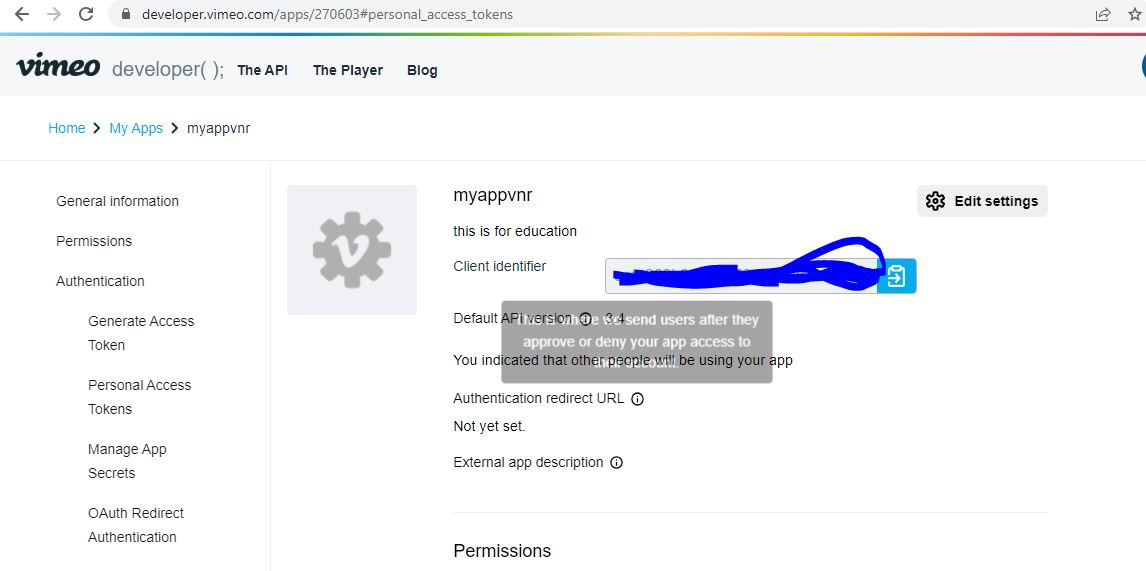

Client secret
format
secret =''
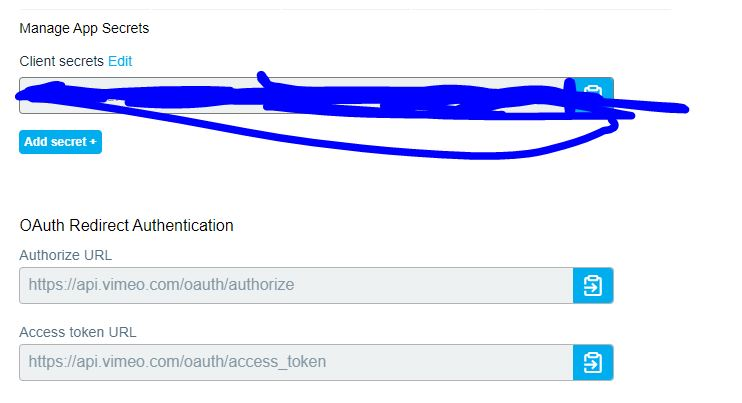

access token format
token=''
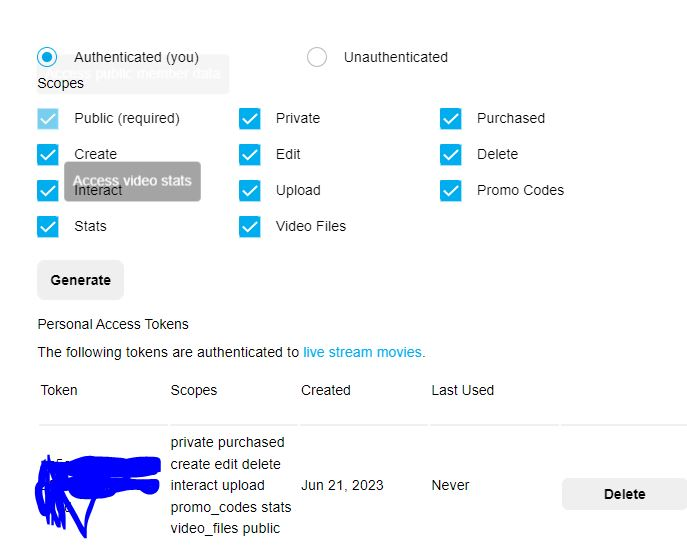

In [ ]:
import vimeo

client = vimeo.VimeoClient(
  token='',
  key='',
  secret=''
)

file_name = '/content/darkweb.mkv'
uri = client.upload(file_name, data={
  'name': 'Untitled',
  'description': 'The description goes here.'
})

print(f'Your video URI is: {uri}')

In [ ]:
# uploaad by folder
import os
import vimeo

# Initialize the Vimeo client
client = vimeo.VimeoClient(
  token='',
  key='',
  secret=''
)

# Specify the directory containing the videos
directory = '/path/to/your/video/directory'

# Iterate over every file in the directory
for filename in os.listdir(directory):
    # Check if the file is a video (you can add more video formats if needed)
    if filename.endswith('.mkv') or filename.endswith('.mp4'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)

        # Upload the video to Vimeo and set the name as the filename
        uri = client.upload(file_path, data={
            'name': filename,
            'description': 'The description goes here.'
        })

        print(f'Uploaded {filename} with URI: {uri}')
    else:
        print(f'Skipped non-video file: {filename}')
